In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/classification-of-coronary-artery-disease/CAD.csv


In [52]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
df = pd.read_csv("/kaggle/input/classification-of-coronary-artery-disease/CAD.csv")

In [54]:
df.head()

Age  Weight  Length    Sex        BMI  DM  HTN  Current Smoker  EX-Smoker  \
0   53      90     175   Male  29.387755   0    1               1          0   
1   67      70     157  Fmale  28.398718   0    1               0          0   
2   54      54     164   Male  20.077335   0    0               1          0   
3   66      67     158  Fmale  26.838648   0    1               0          0   
4   50      87     153  Fmale  37.165193   0    1               0          0   

   FH  ...    K   Na    WBC Lymph Neut  PLT EF-TTE  Region RWMA     VHD  \
0   0  ...  4.7  141   5700    39   52  261     50            0       N   
1   0  ...  4.7  156   7700    38   55  165     40            4       N   
2   0  ...  4.7  139   7400    38   60  230     40            2    mild   
3   0  ...  4.4  142  13000    18   72  742     55            0  Severe   
4   0  ...  4.0  140   9200    55   39  274     50            0  Severe   

     Cath  
0     Cad  
1     Cad  
2     Cad  
3  Normal  
4  Normal  

[5 rows x 55 columns]

In [55]:
df.describe()

Age      Weight      Length         BMI          DM         HTN  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    58.897690   73.831683  164.716172   27.248339    0.297030    0.590759   
std     10.392278   11.987358    9.327661    4.098865    0.457706    0.492507   
min     30.000000   48.000000  140.000000   18.115413    0.000000    0.000000   
25%     51.000000   65.000000  158.000000   24.514380    0.000000    0.000000   
50%     58.000000   74.000000  165.000000   26.775510    0.000000    1.000000   
75%     66.000000   81.000000  171.000000   29.411765    1.000000    1.000000   
max     86.000000  120.000000  188.000000   40.900658    1.000000    1.000000   

       Current Smoker   EX-Smoker          FH          BP  ...         ESR  \
count      303.000000  303.000000  303.000000  303.000000  ...  303.000000   
mean         0.207921    0.033003    0.158416  129.554455  ...   19.462046   
std          0.406491    0.178941    0.365734   18.938105  ...   15.936475   
min          0.000000    0.000000    0.000000   90.000000  ...    1.000000   
25%          0.000000    0.000000    0.000000  120.000000  ...    9.000000   
50%          0.000000    0.000000    0.000000  130.000000  ...   15.000000   
75%          0.000000    0.000000    0.000000  140.000000  ...   26.000000   
max          1.000000    1.000000    1.000000  190.000000  ...   90.000000   

               HB           K          Na           WBC       Lymph  \
count  303.000000  303.000000  303.000000    303.000000  303.000000   
mean    13.153465    4.230693  140.996700   7562.046205   32.399340   
std      1.610452    0.458202    3.807885   2413.739323    9.972592   
min      8.900000    3.000000  128.000000   3700.000000    7.000000   
25%     12.200000    3.900000  139.000000   5800.000000   26.000000   
50%     13.200000    4.200000  141.000000   7100.000000   32.000000   
75%     14.200000    4.500000  143.000000   8800.000000   39.000000   
max     17.600000    6.600000  156.000000  18000.000000   60.000000   

             Neut         PLT      EF-TTE  Region RWMA  
count  303.000000  303.000000  303.000000   303.000000  
mean    60.148515  221.488449   47.231023     0.620462  
std     10.182493   60.796199    8.927194     1.132531  
min     32.000000   25.000000   15.000000     0.000000  
25%     52.500000  183.500000   45.000000     0.000000  
50%     60.000000  210.000000   50.000000     0.000000  
75%     67.000000  250.000000   55.000000     1.000000  
max     89.000000  742.000000   60.000000     4.000000  

[8 rows x 34 columns]

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [57]:
#Classfying Features into different lists

def classify_features(df_new):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [58]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

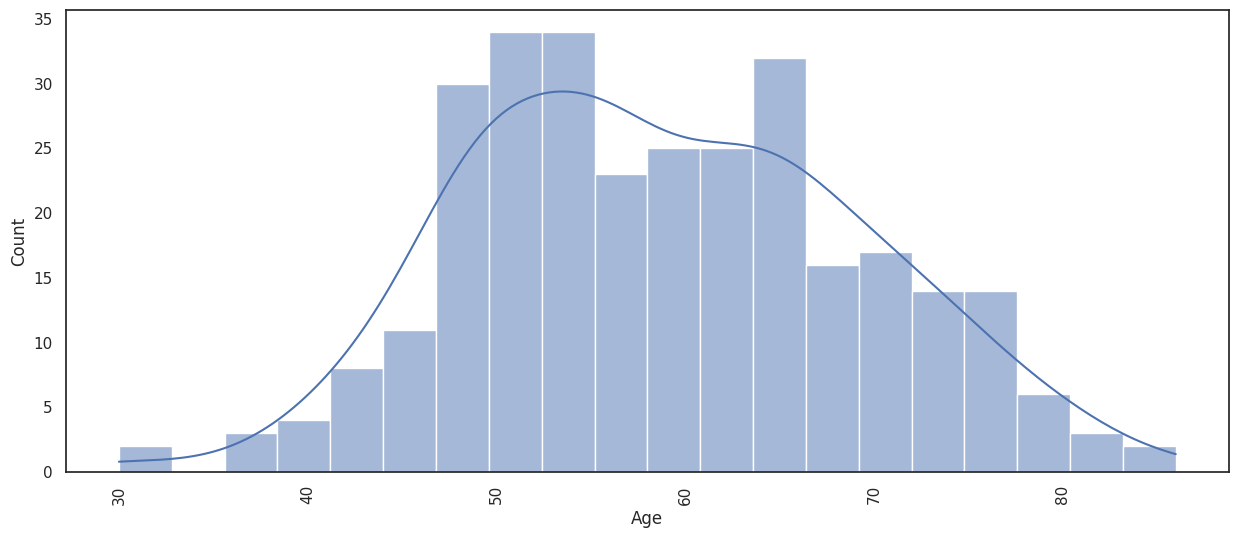

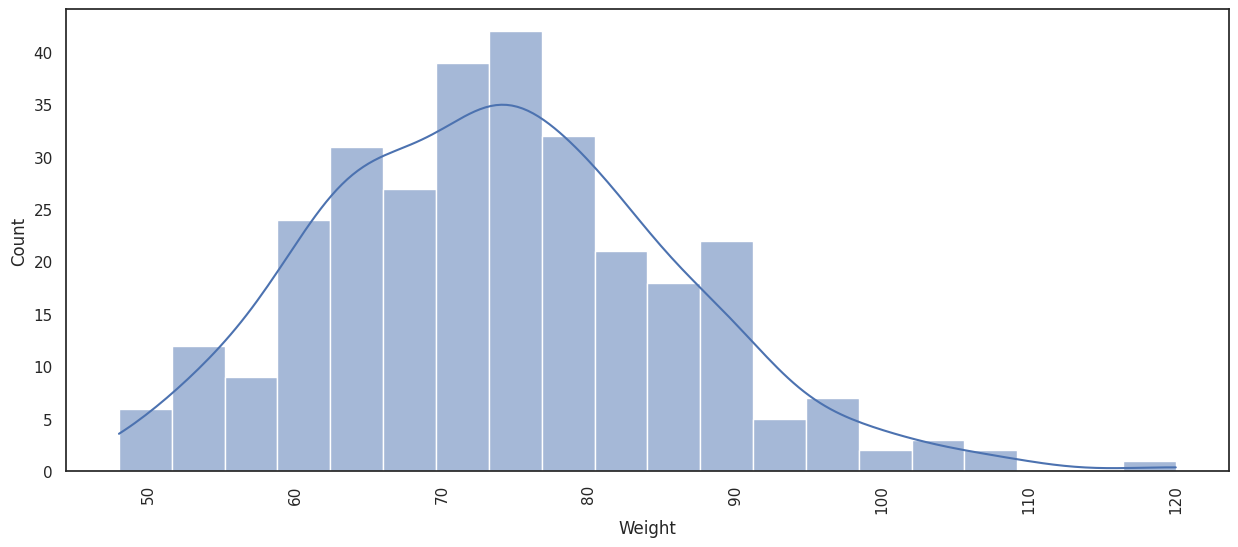

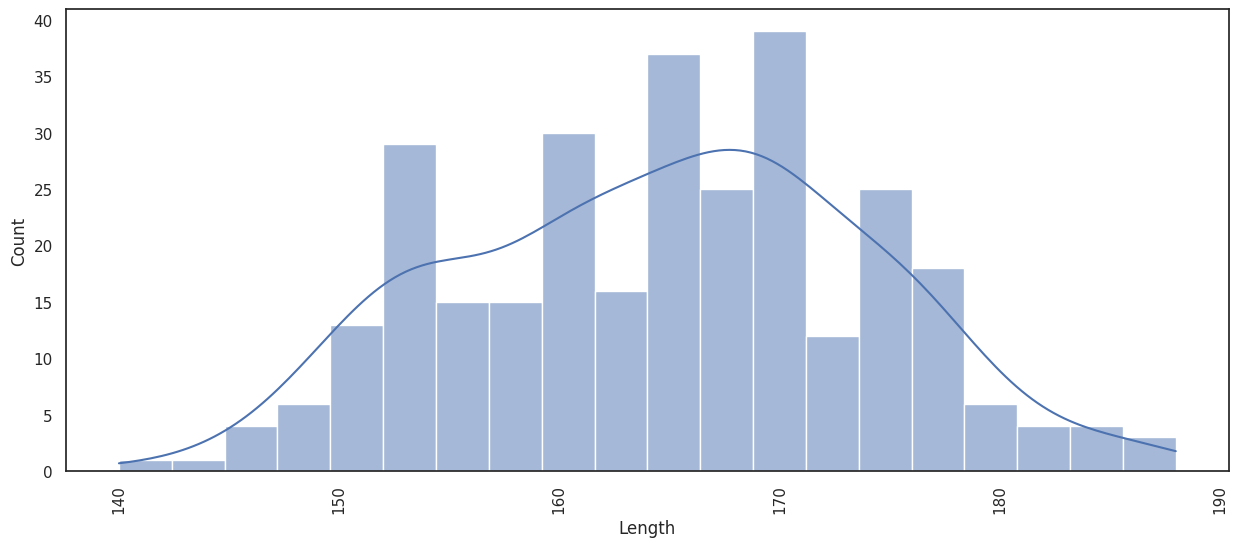

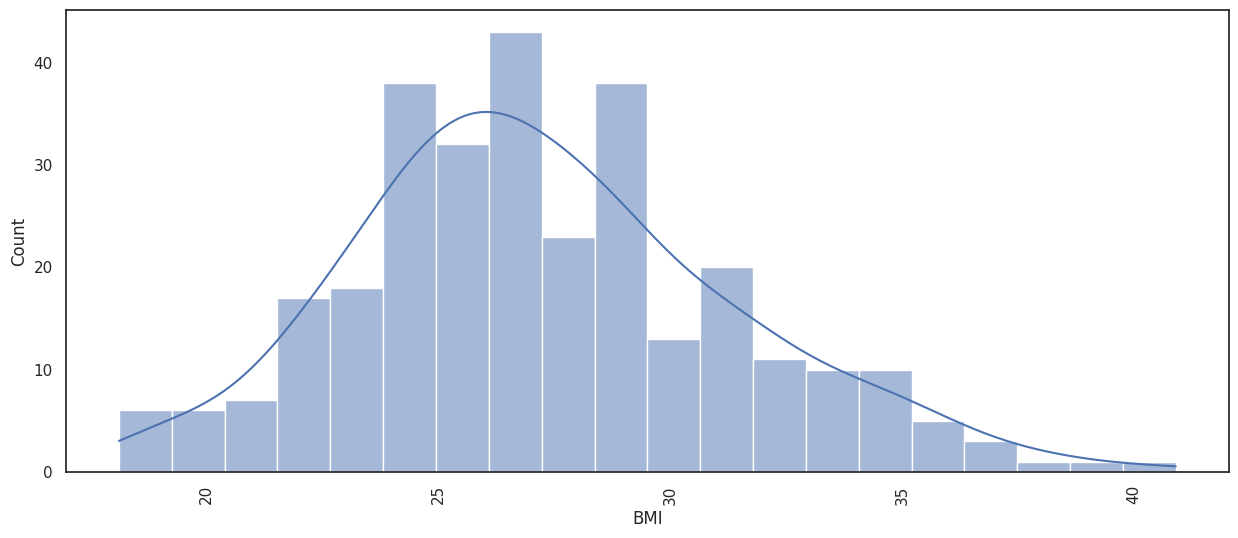

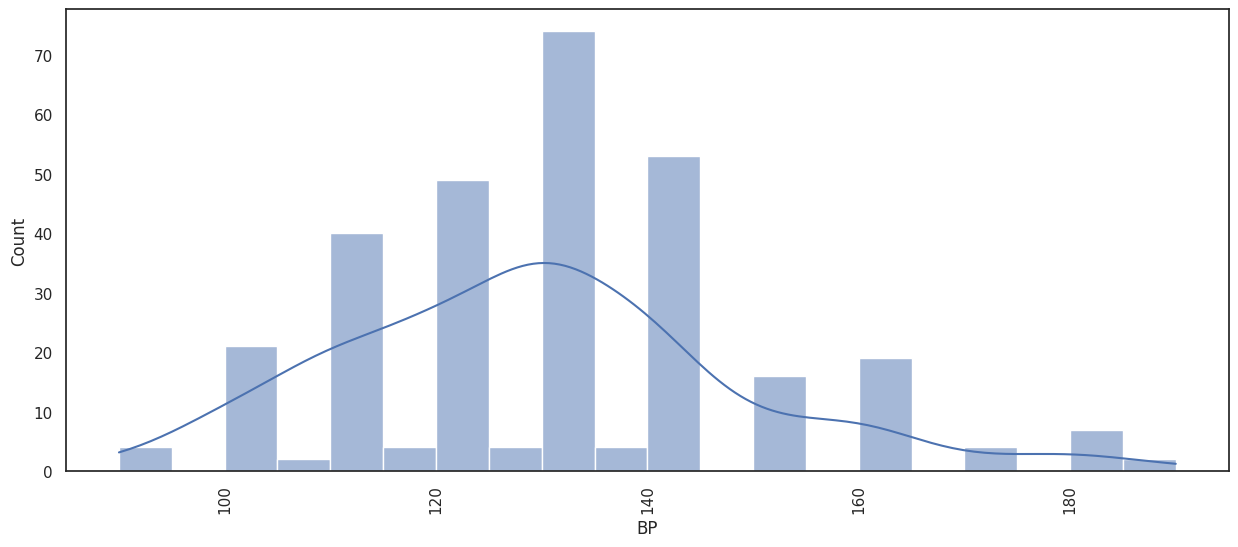

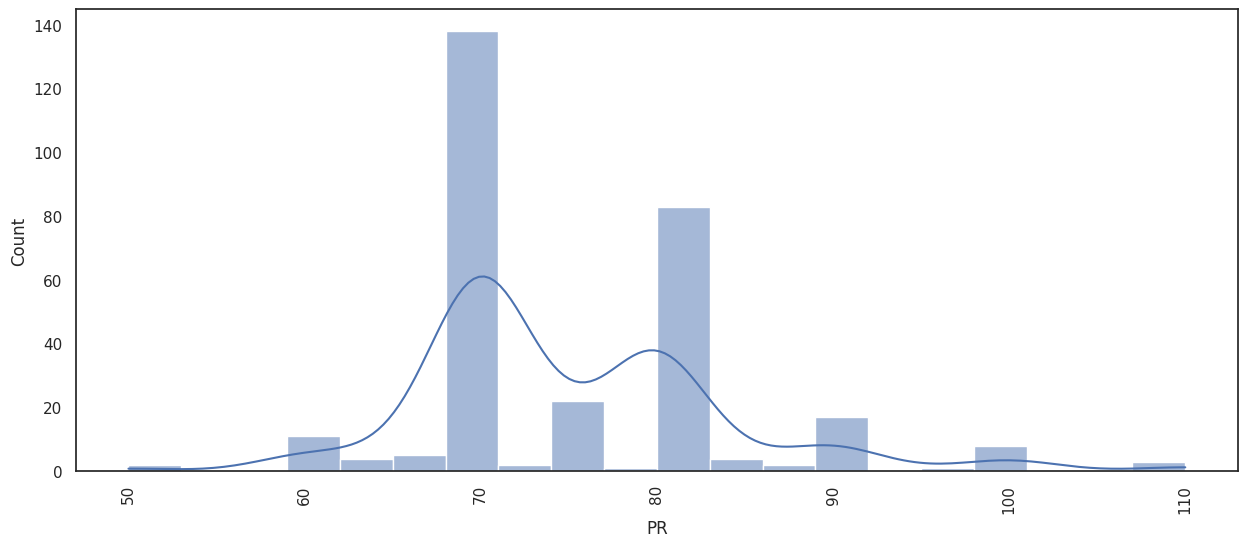

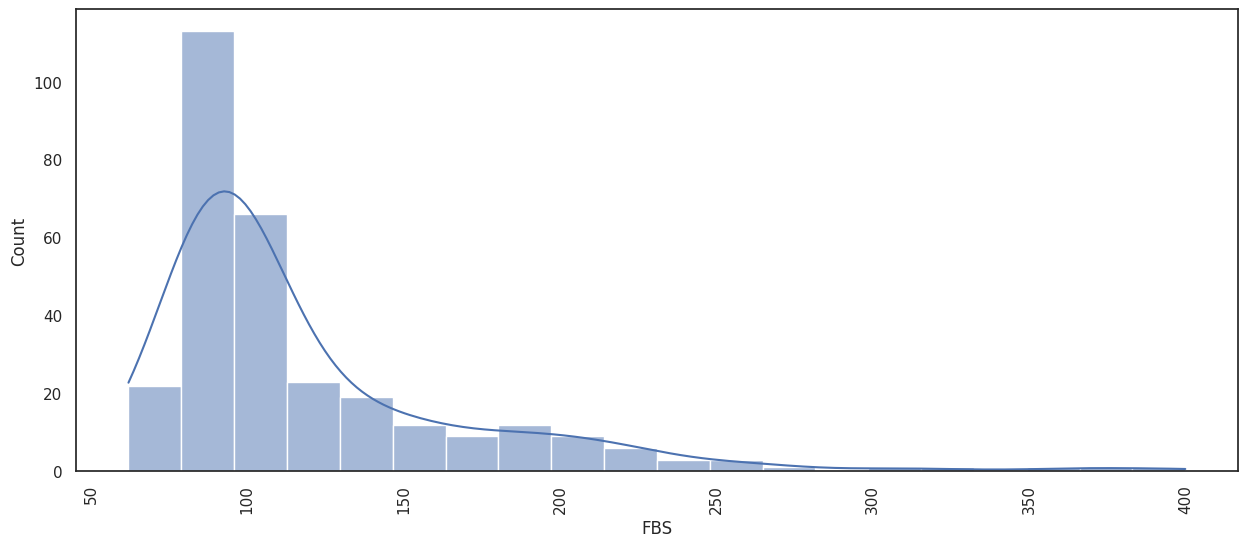

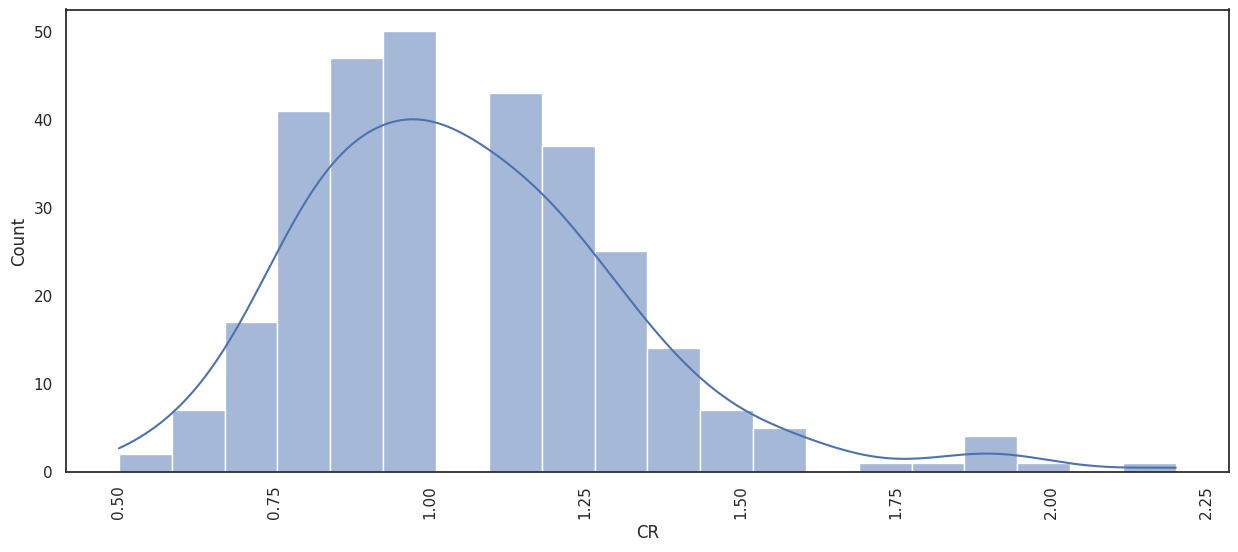

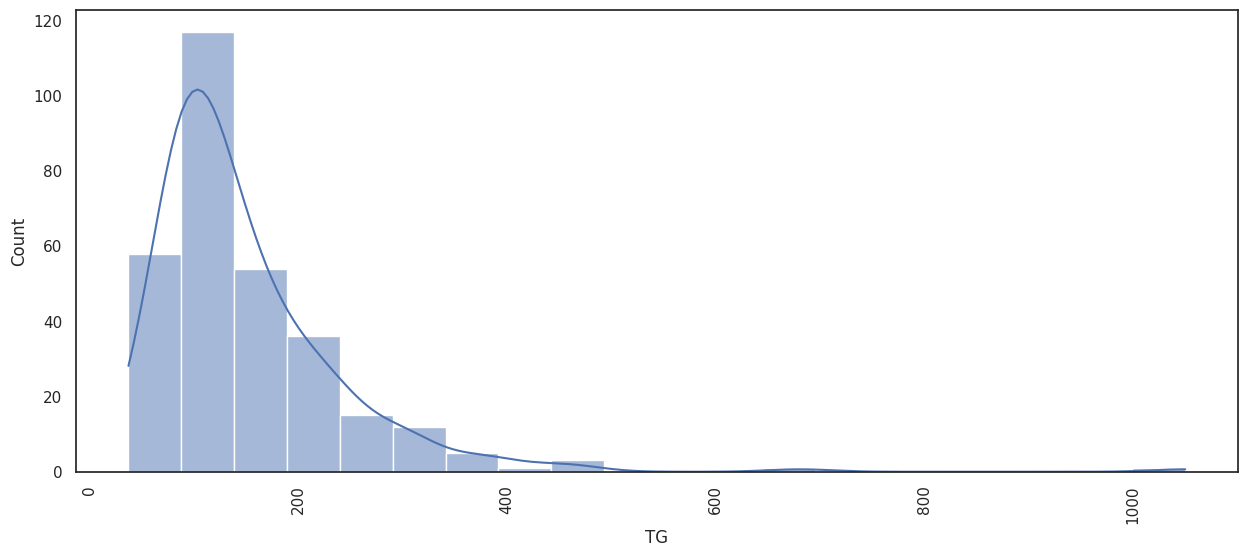

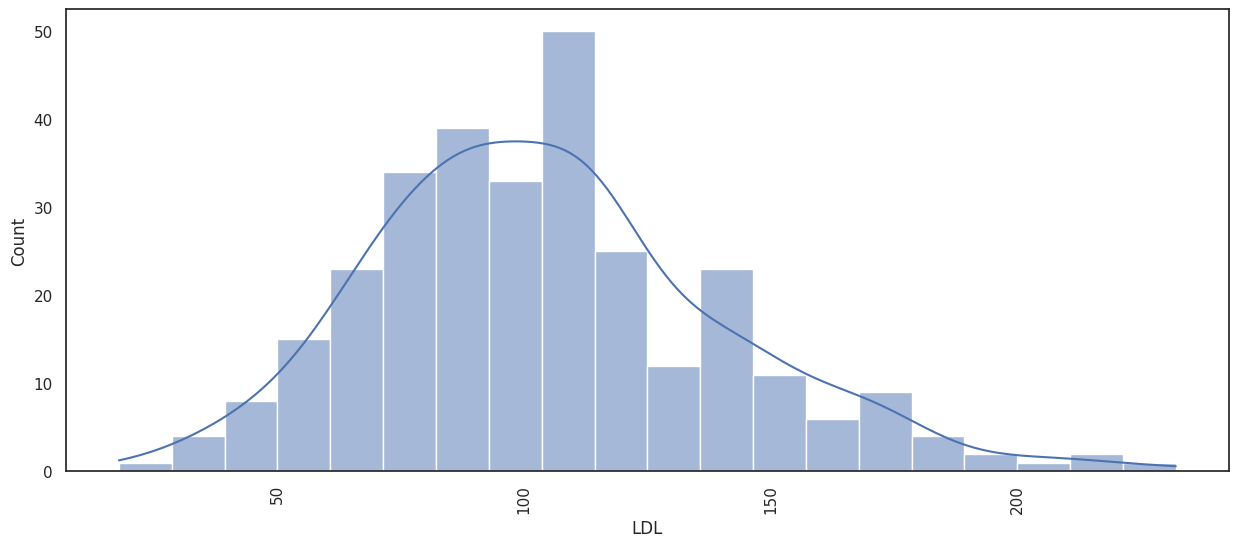

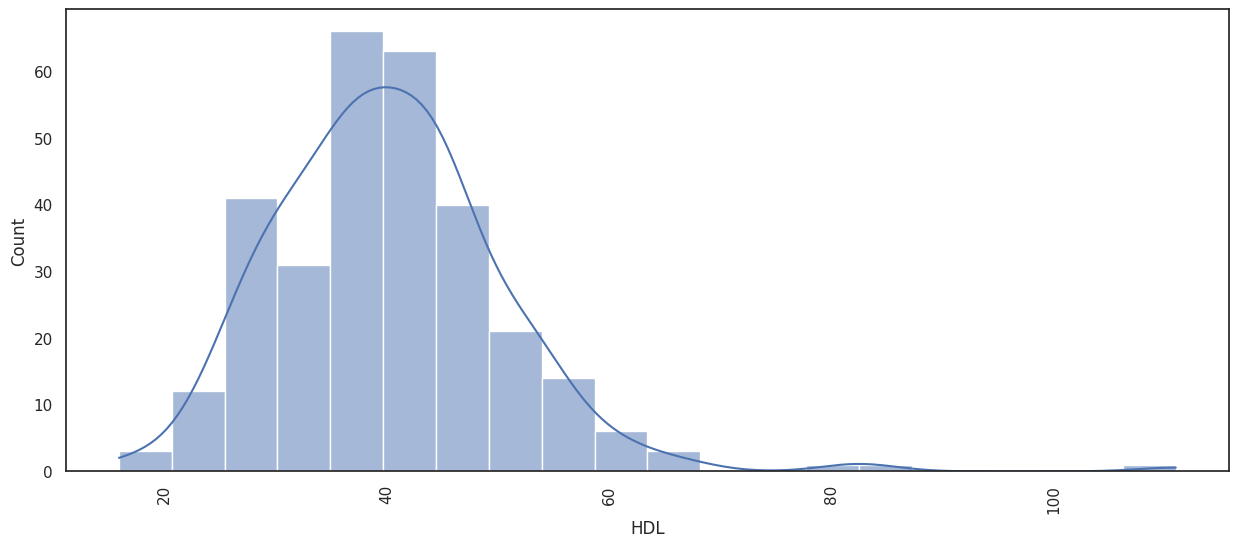

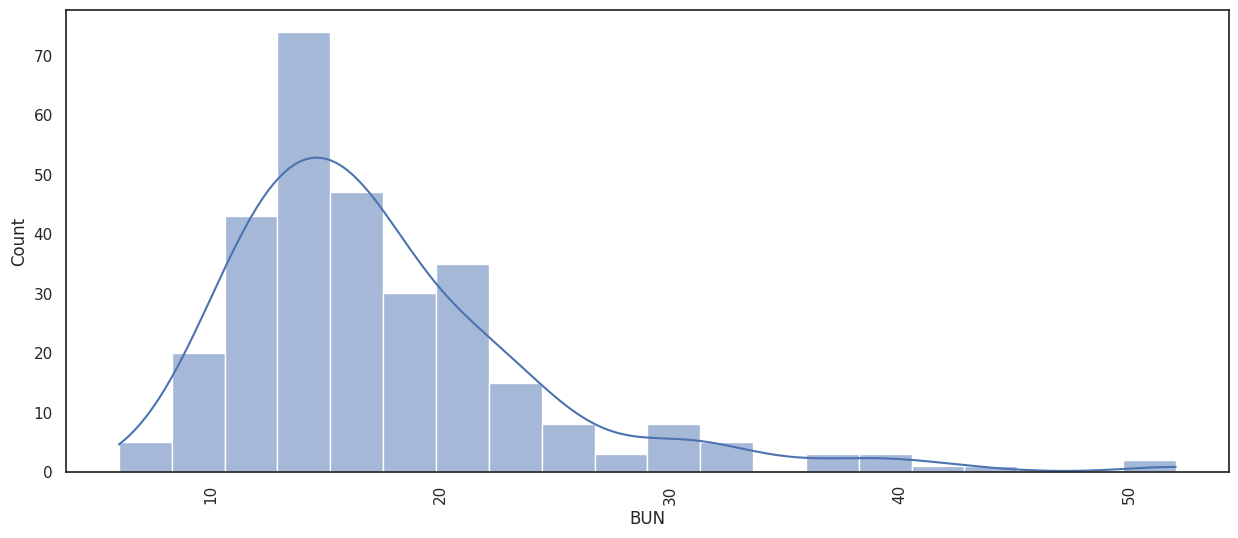

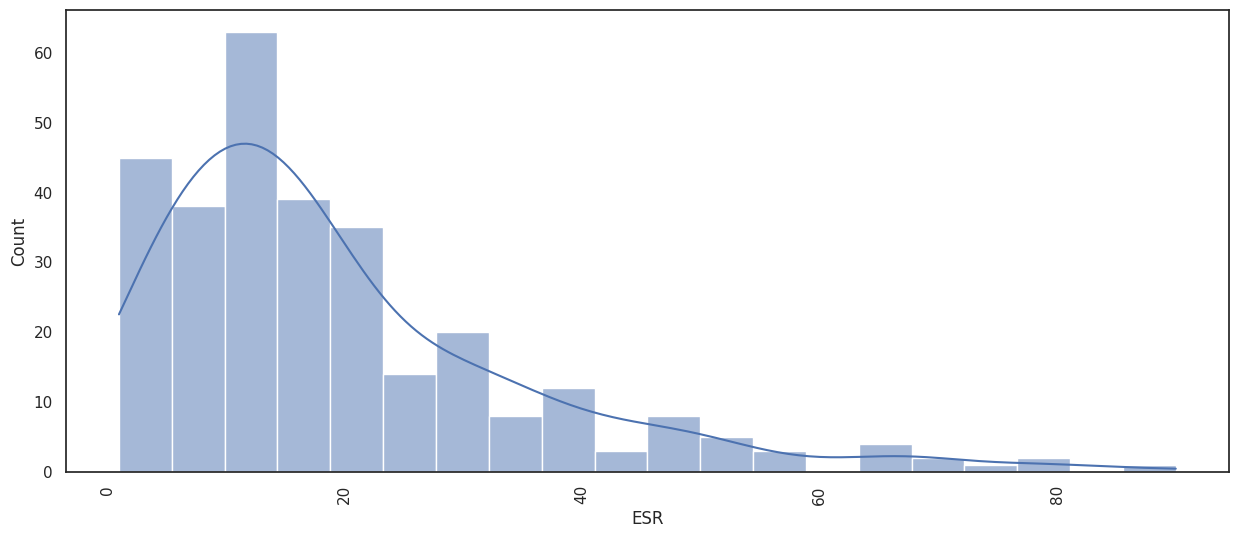

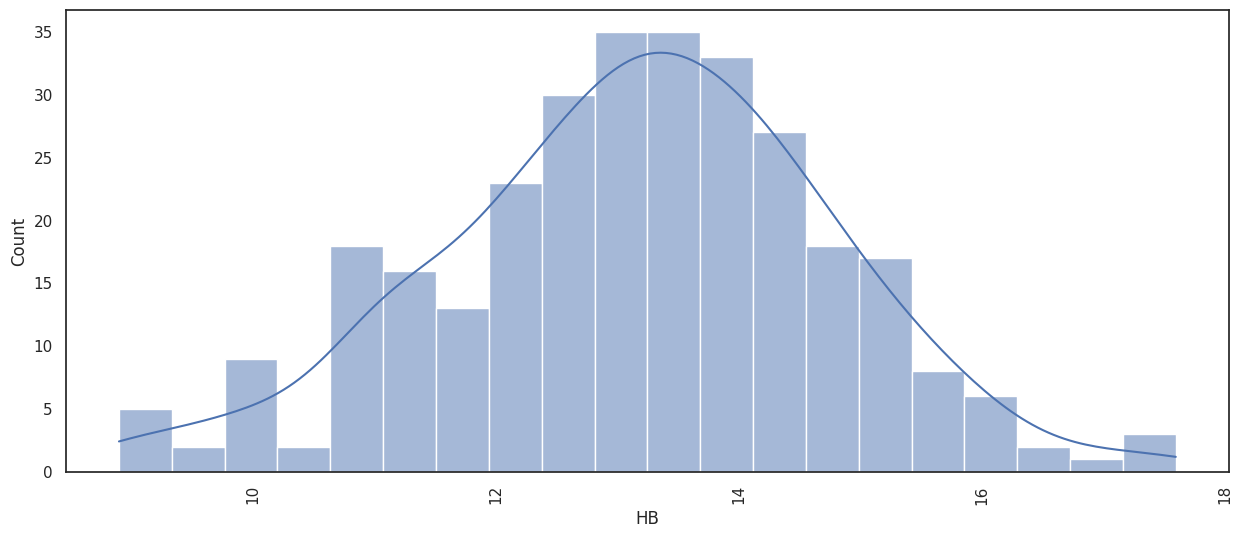

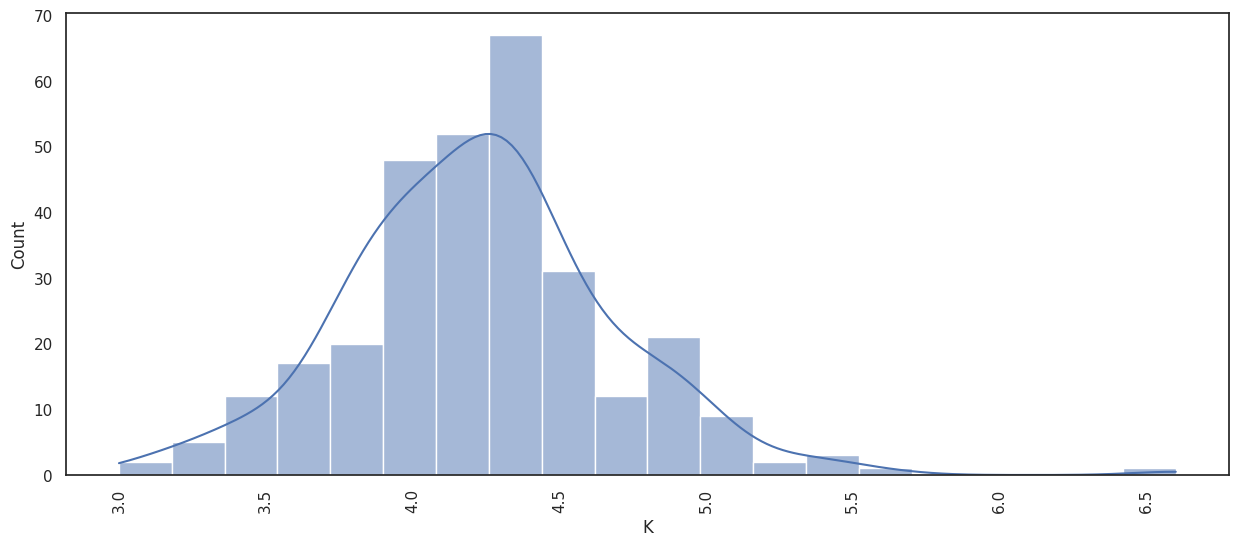

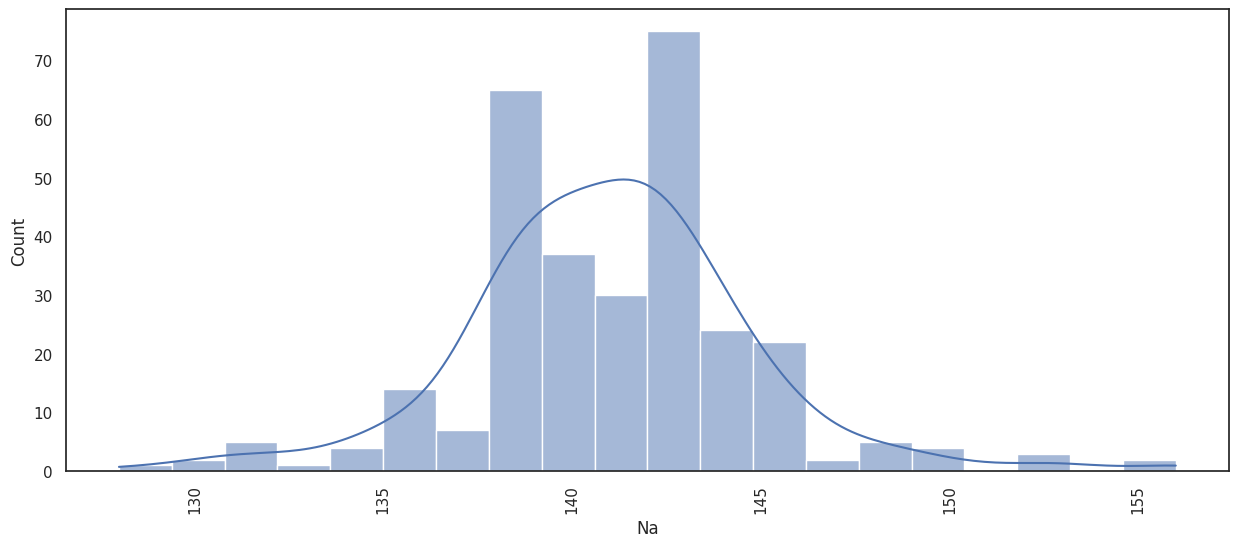

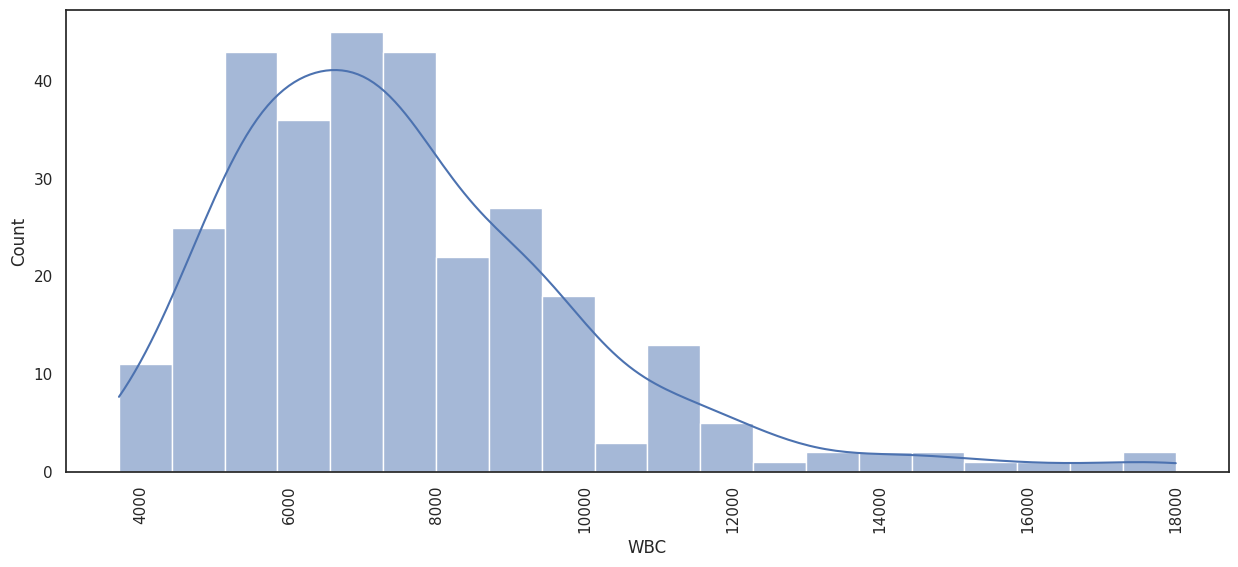

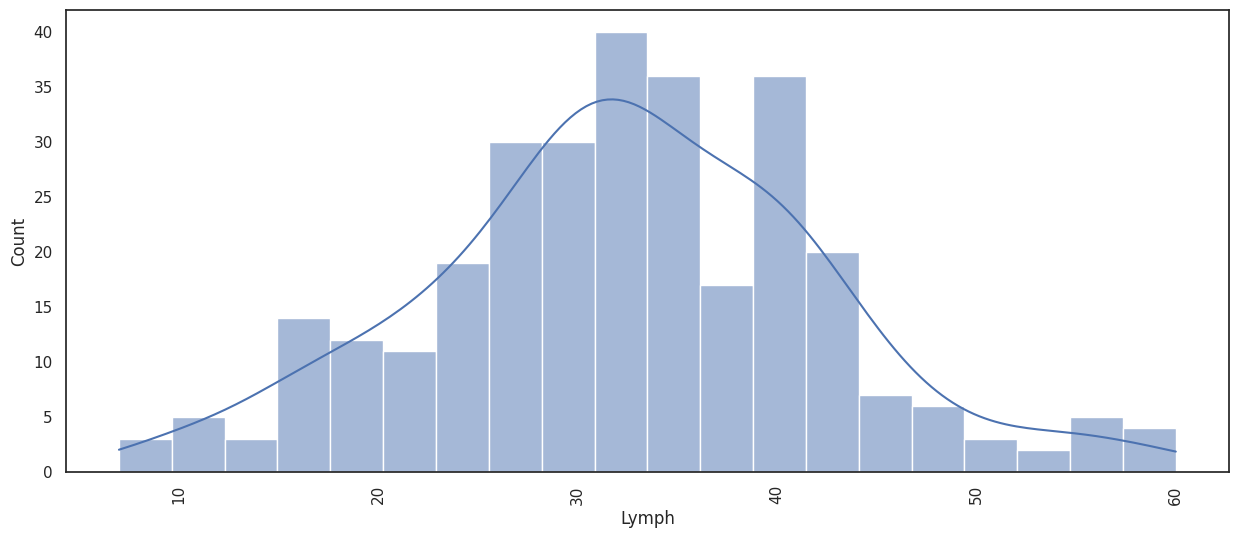

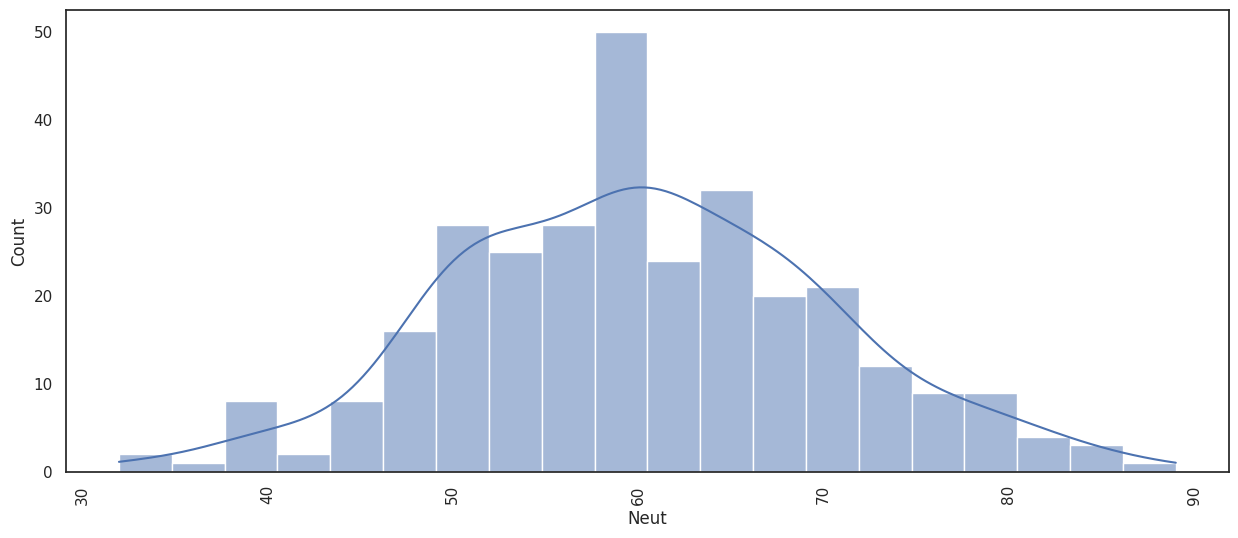

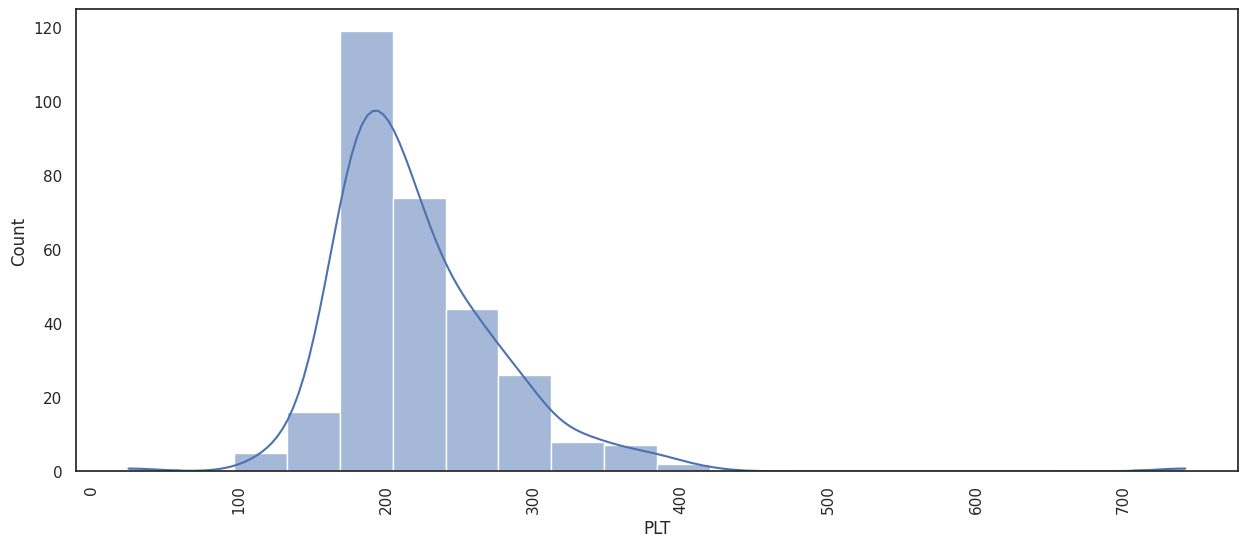

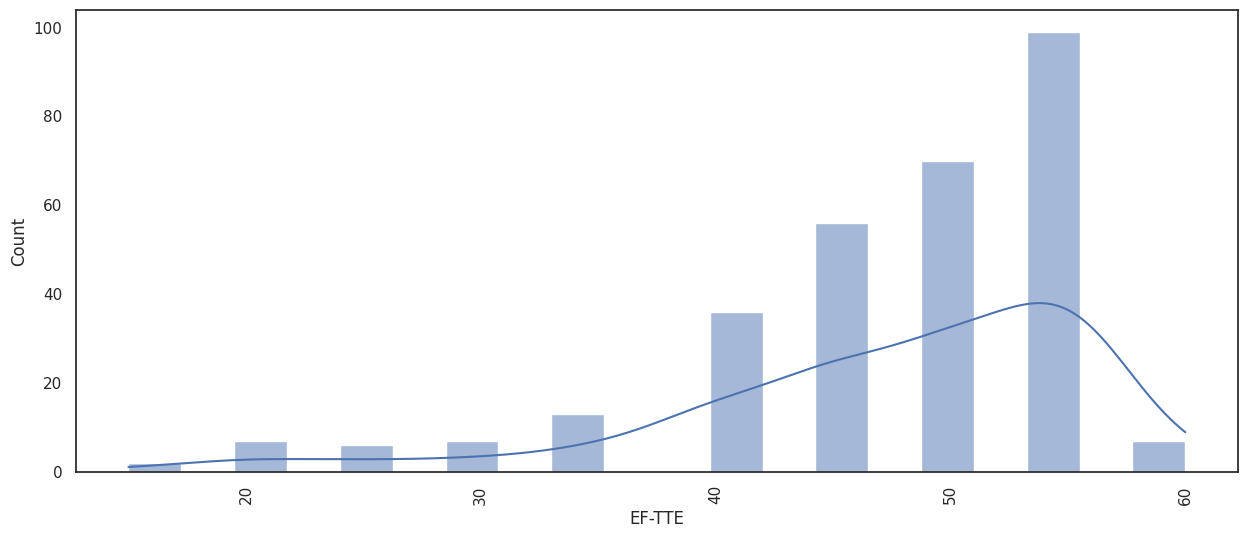

In [60]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

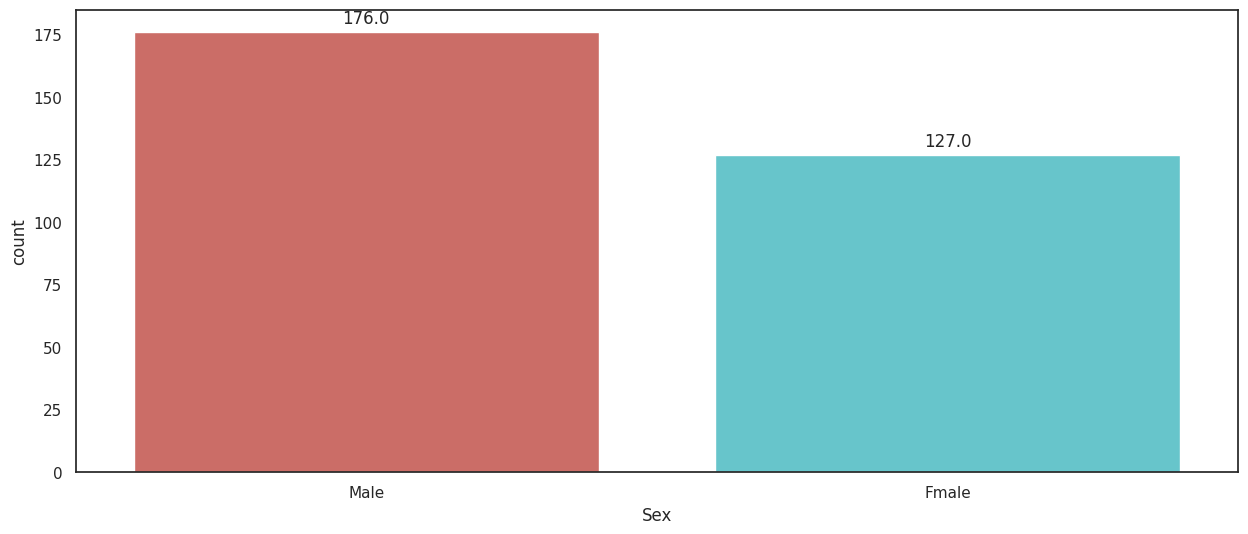

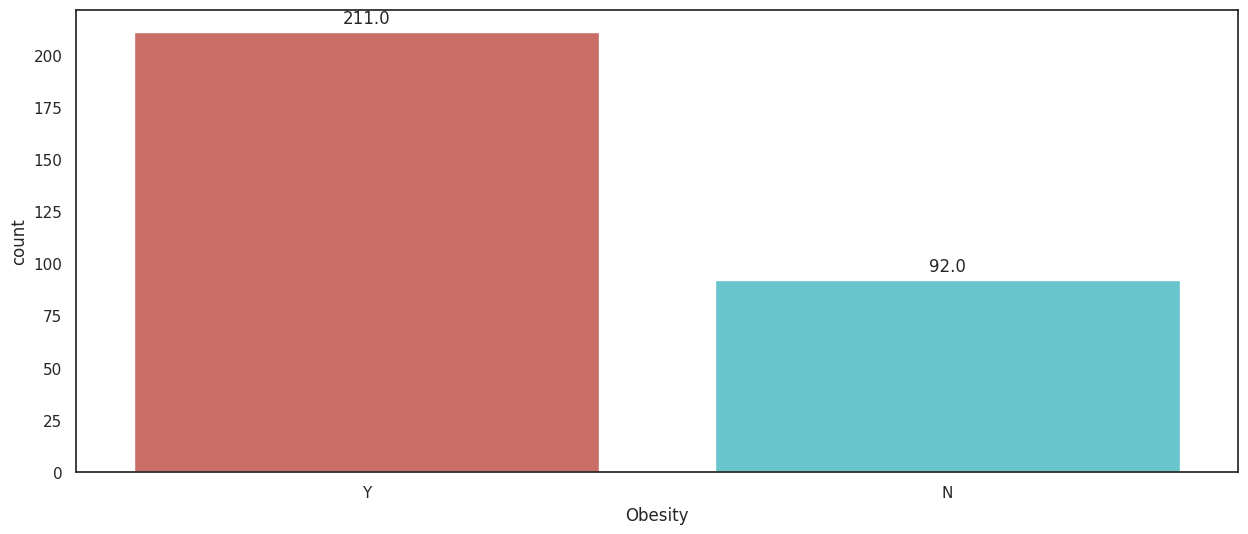

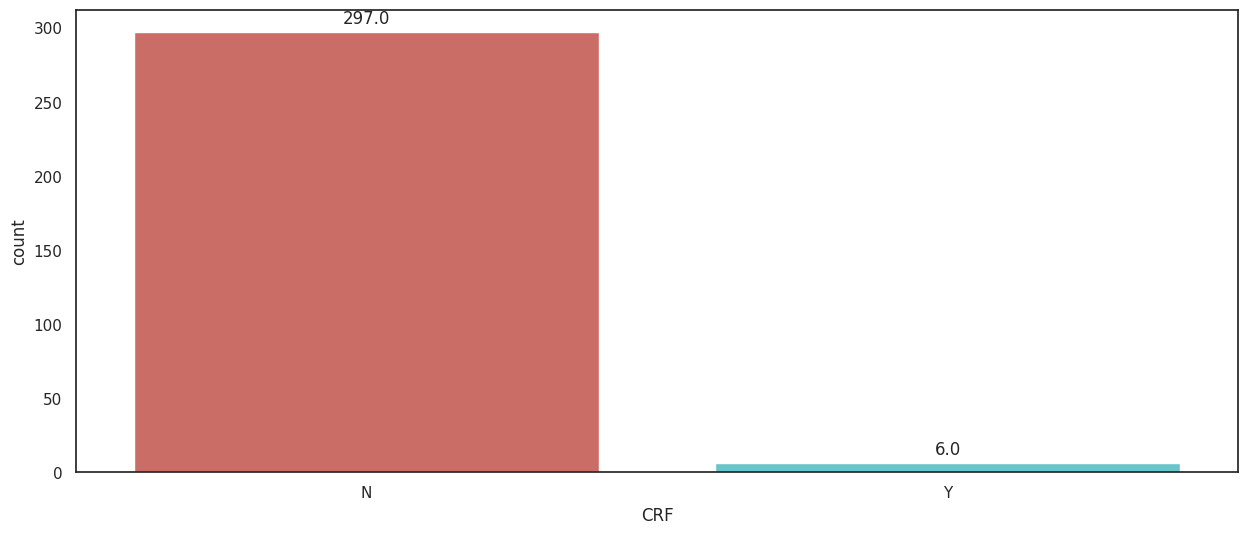

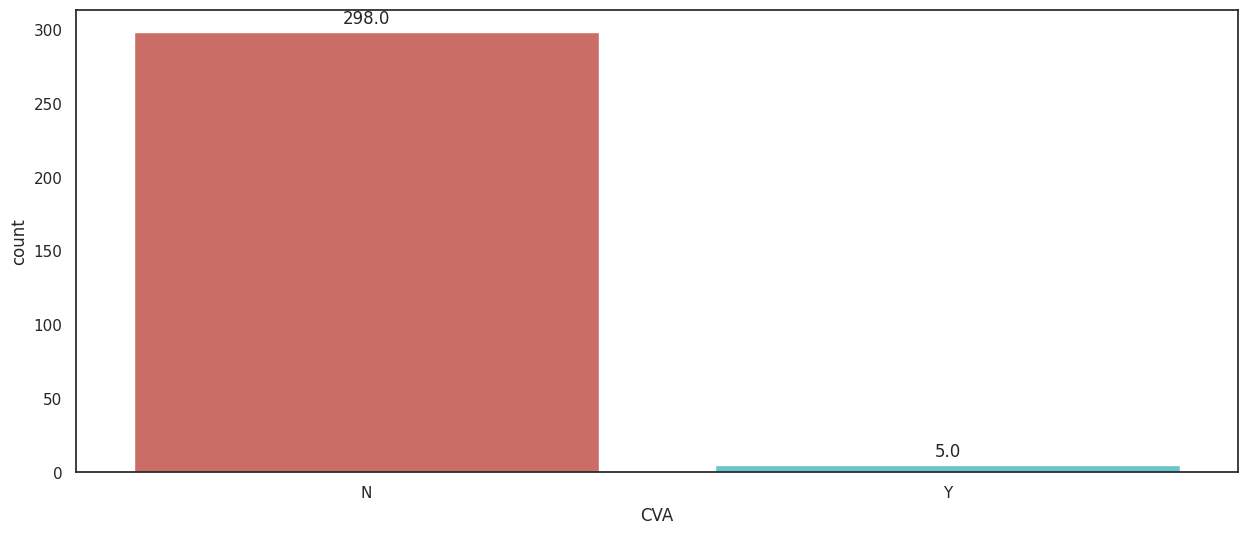

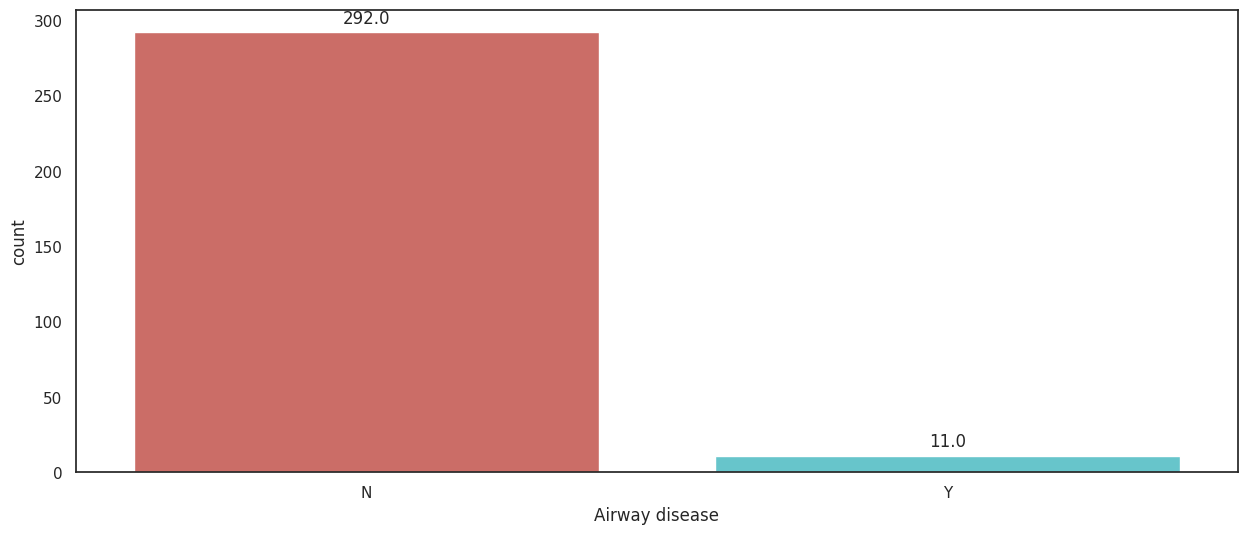

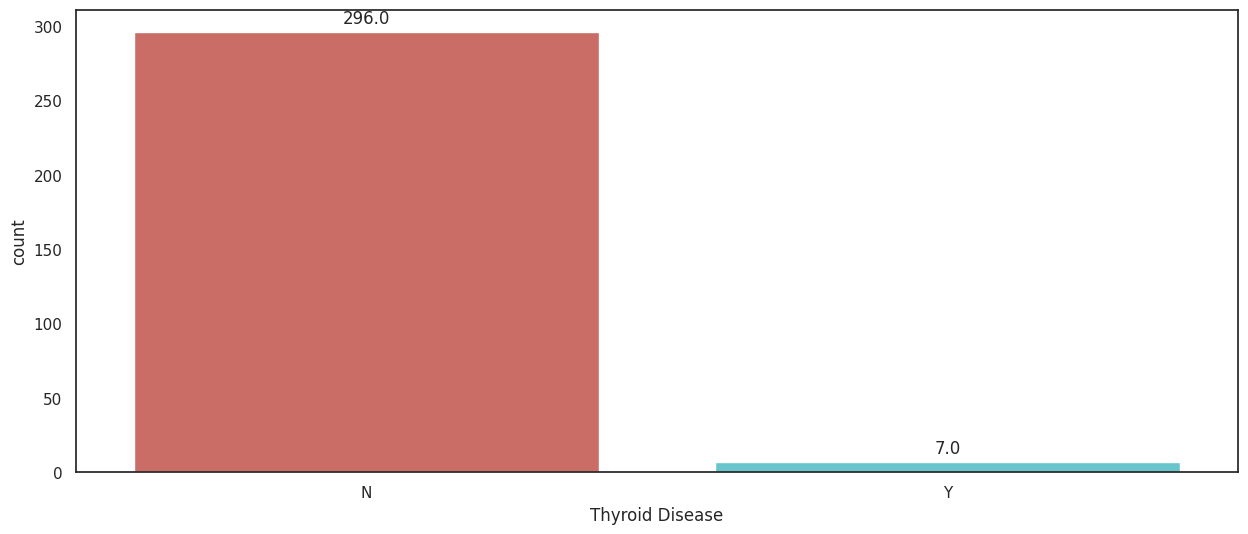

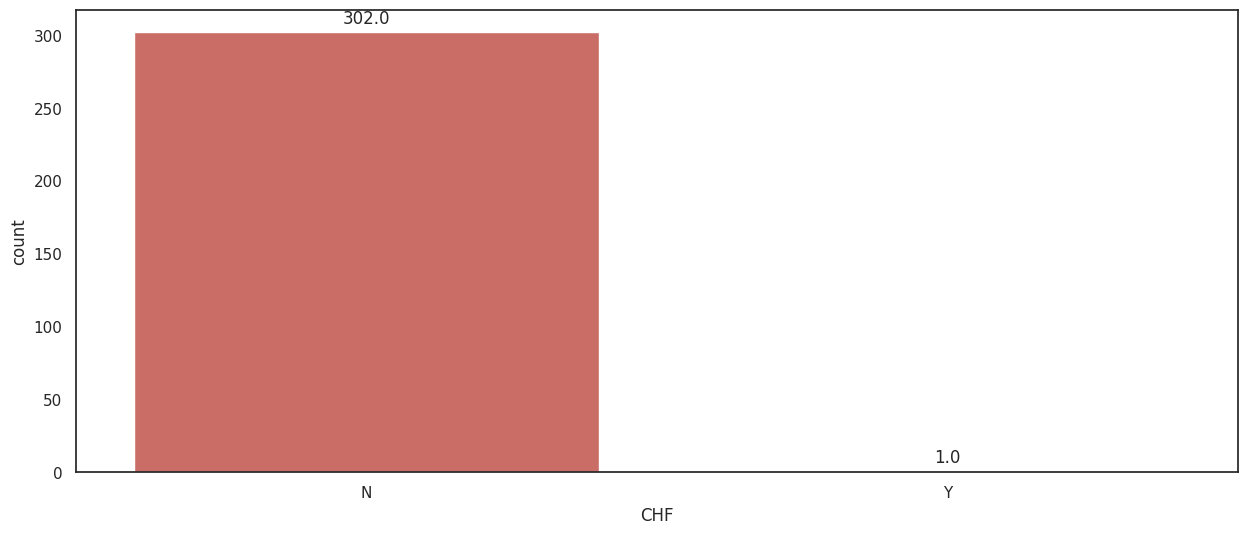

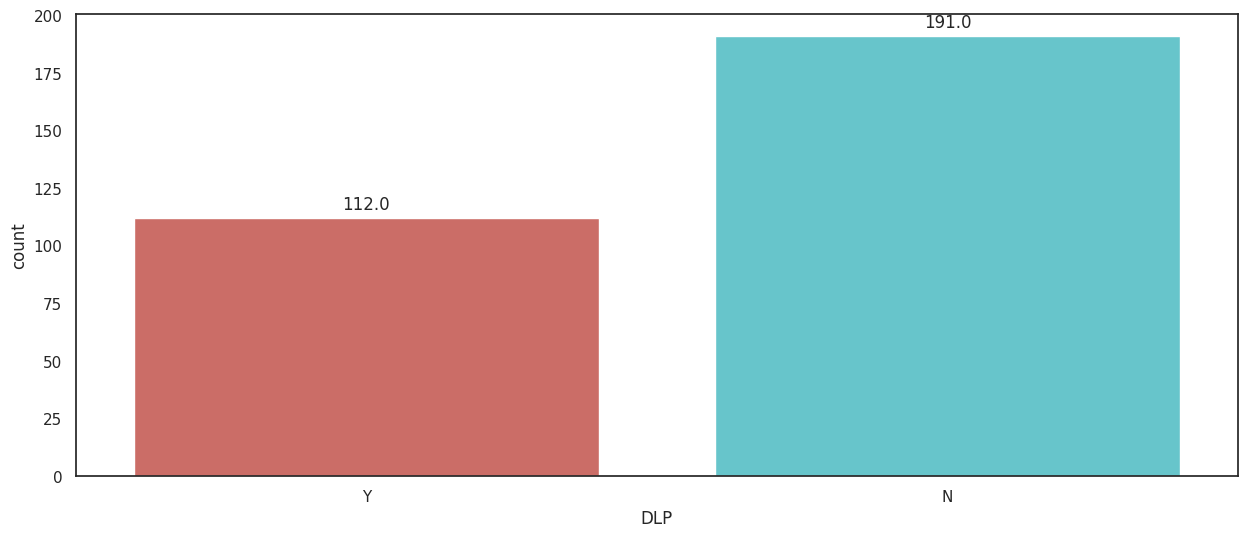

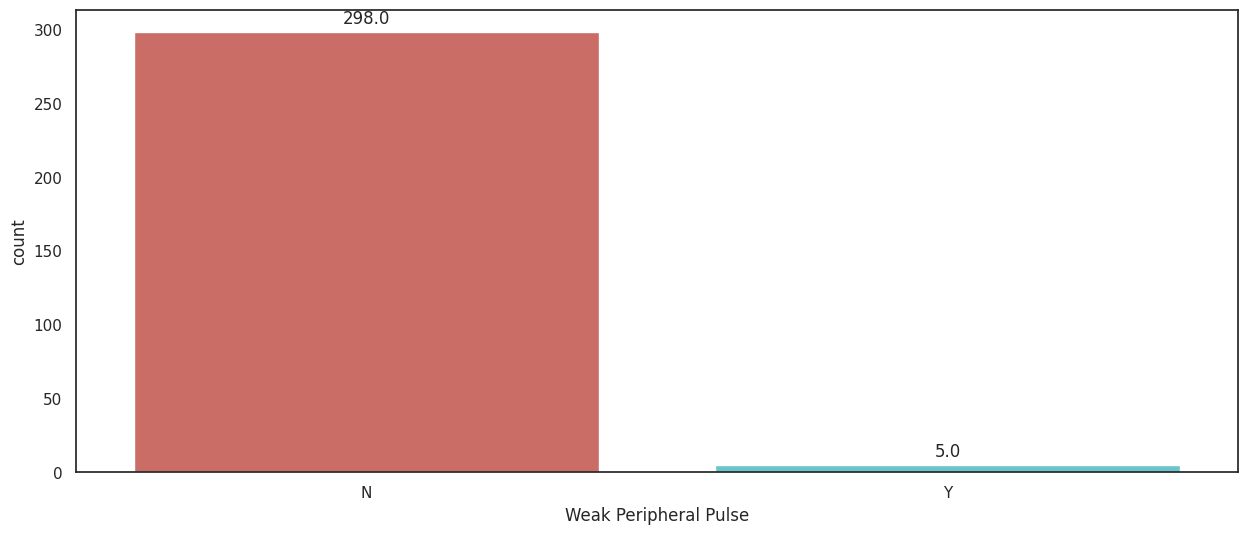

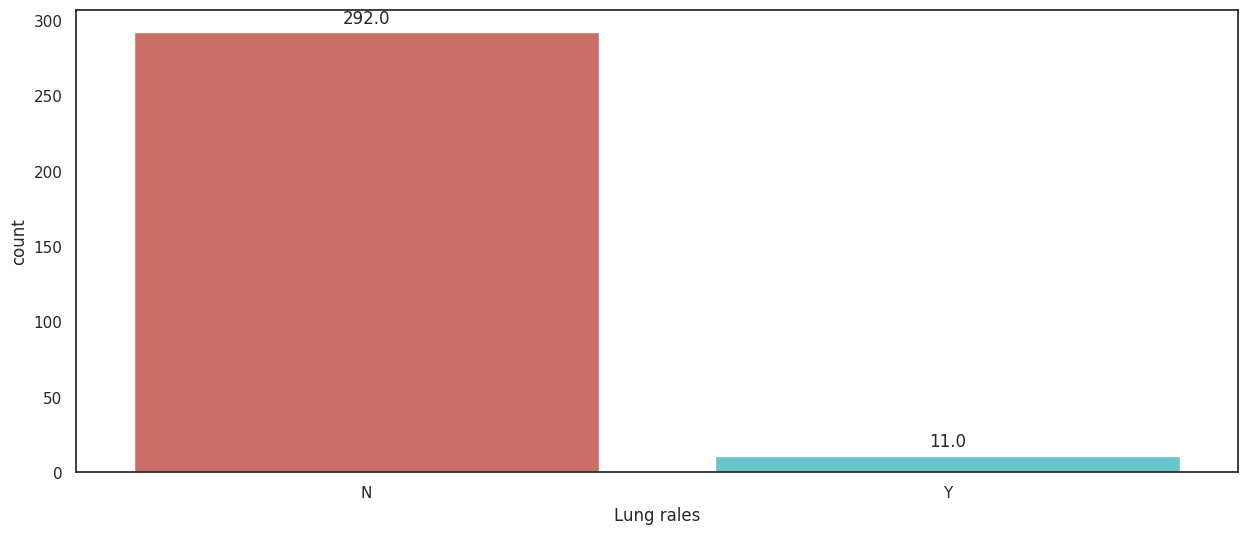

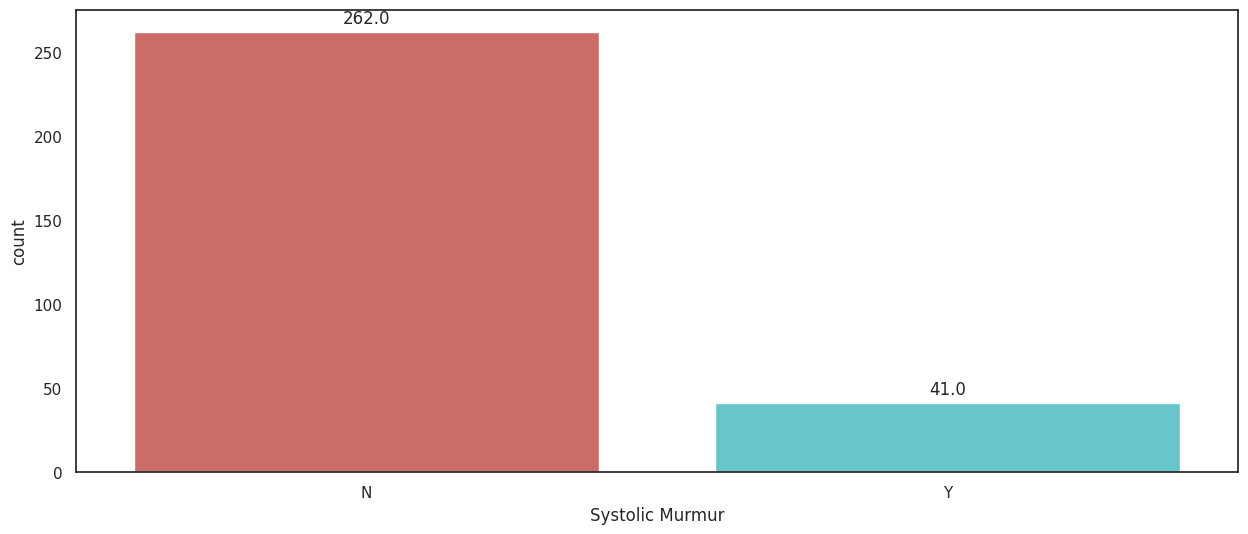

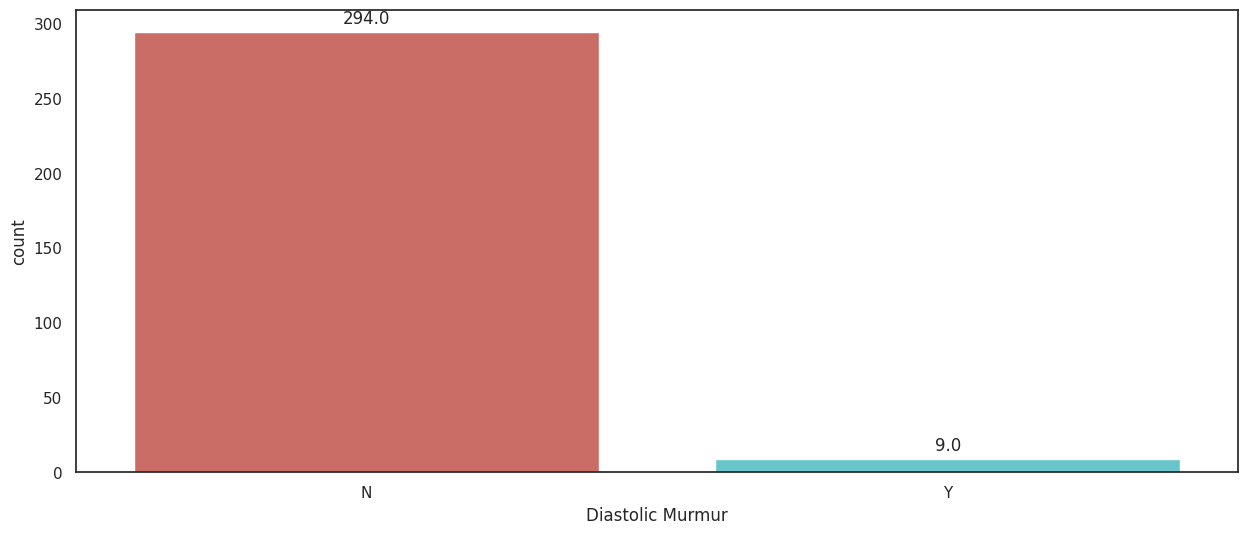

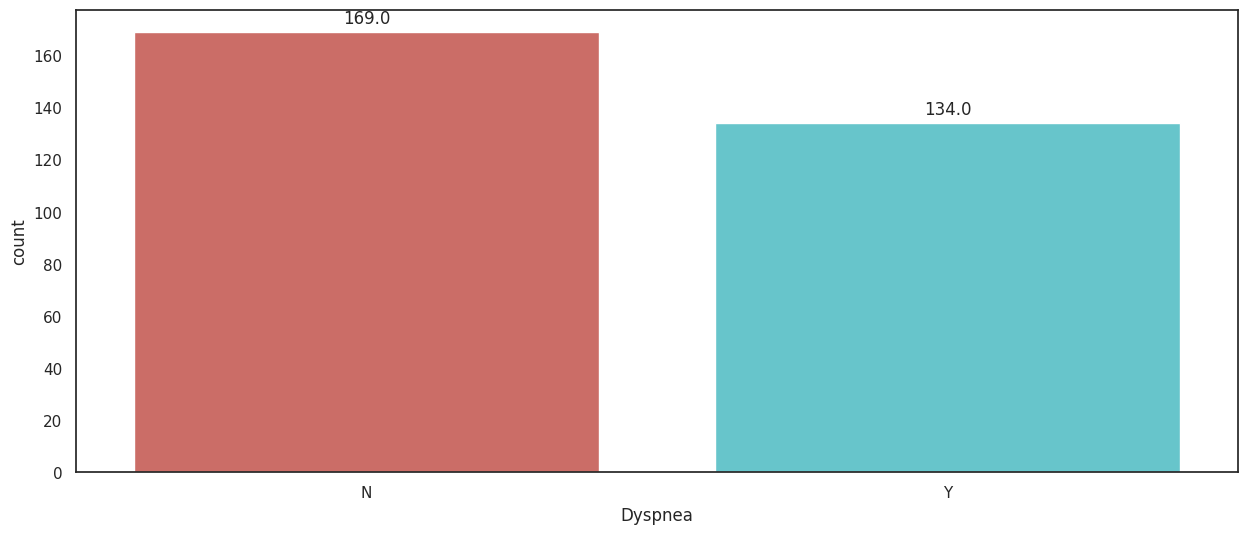

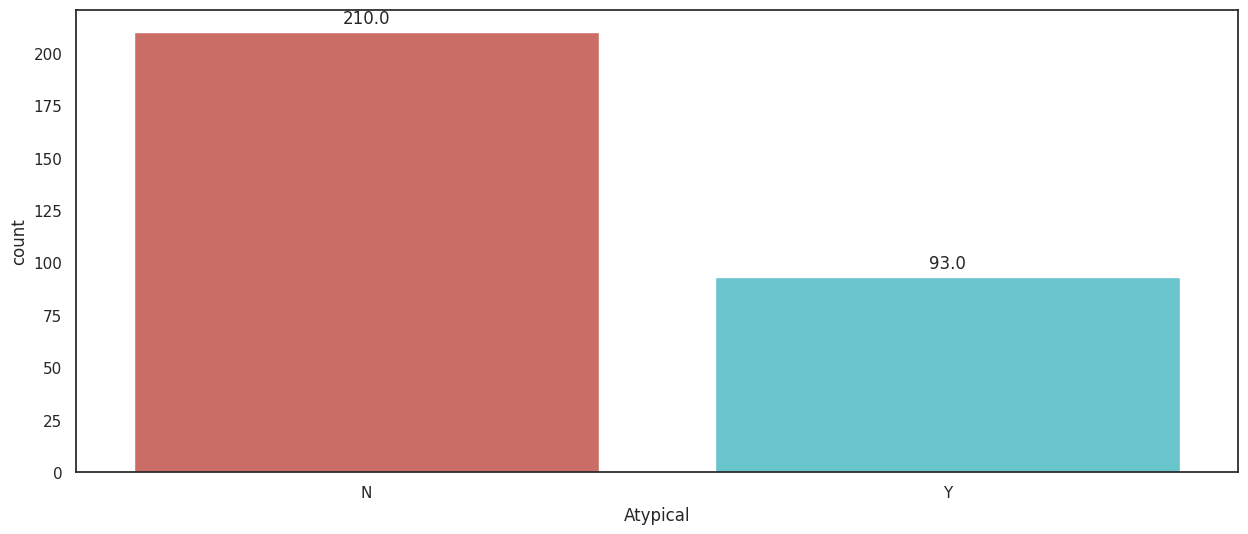

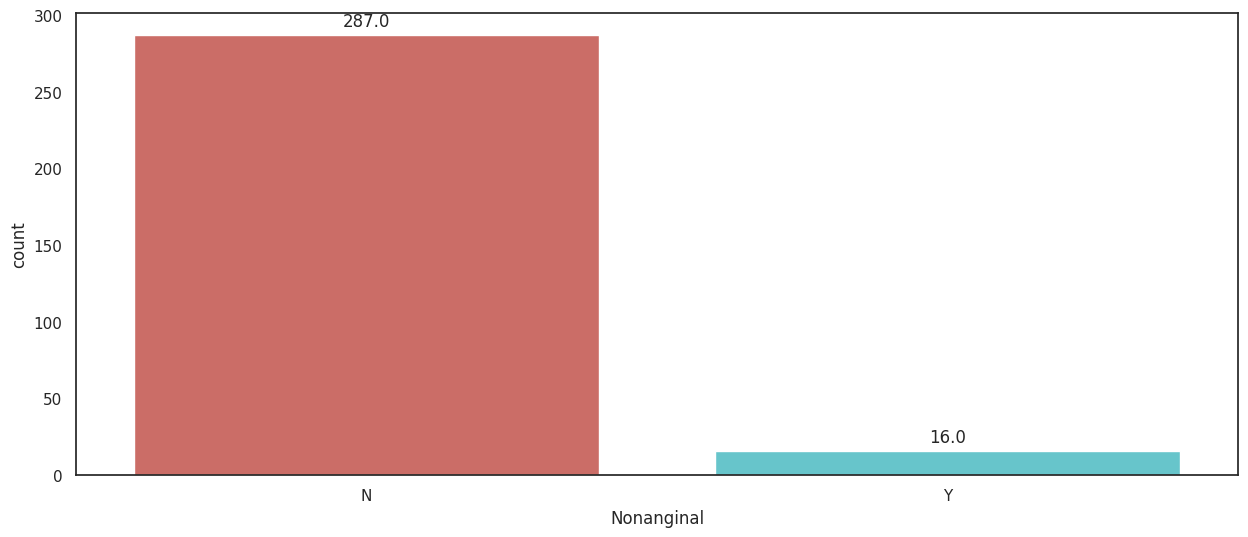

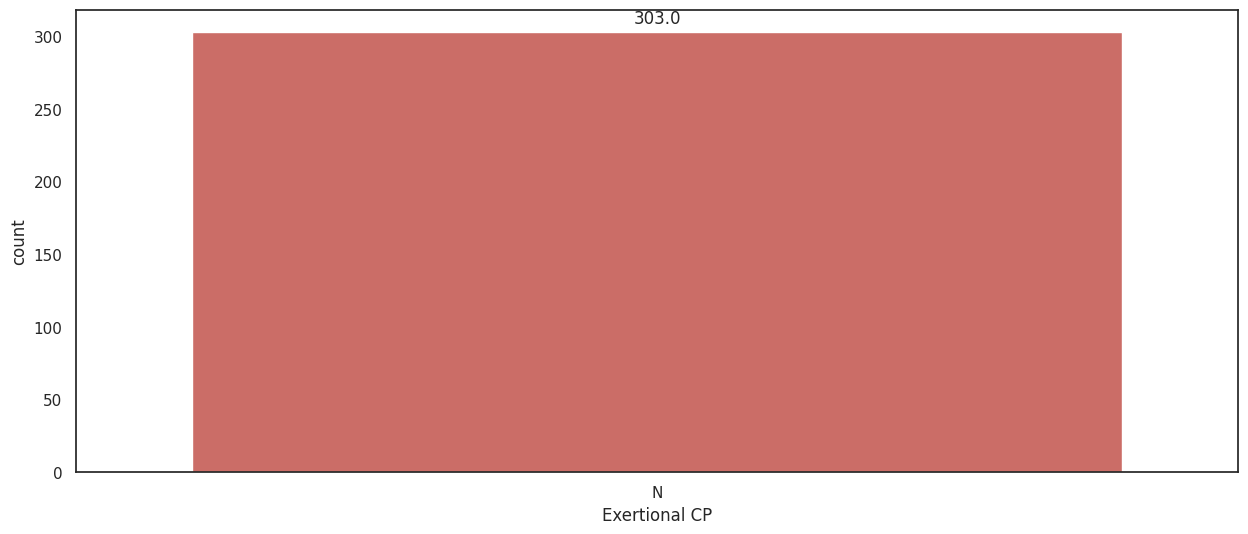

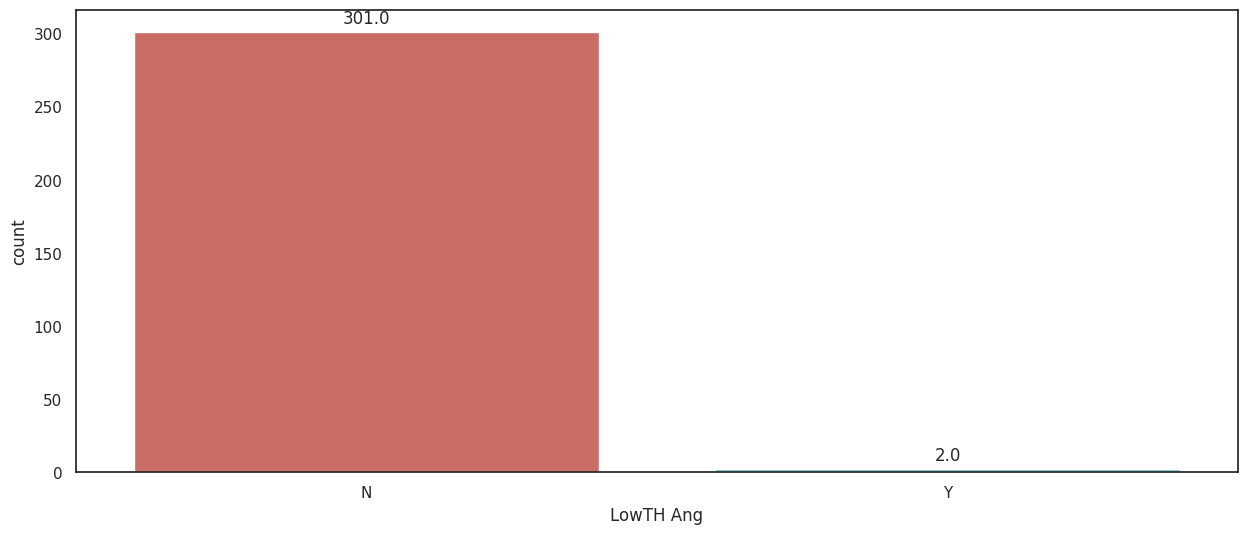

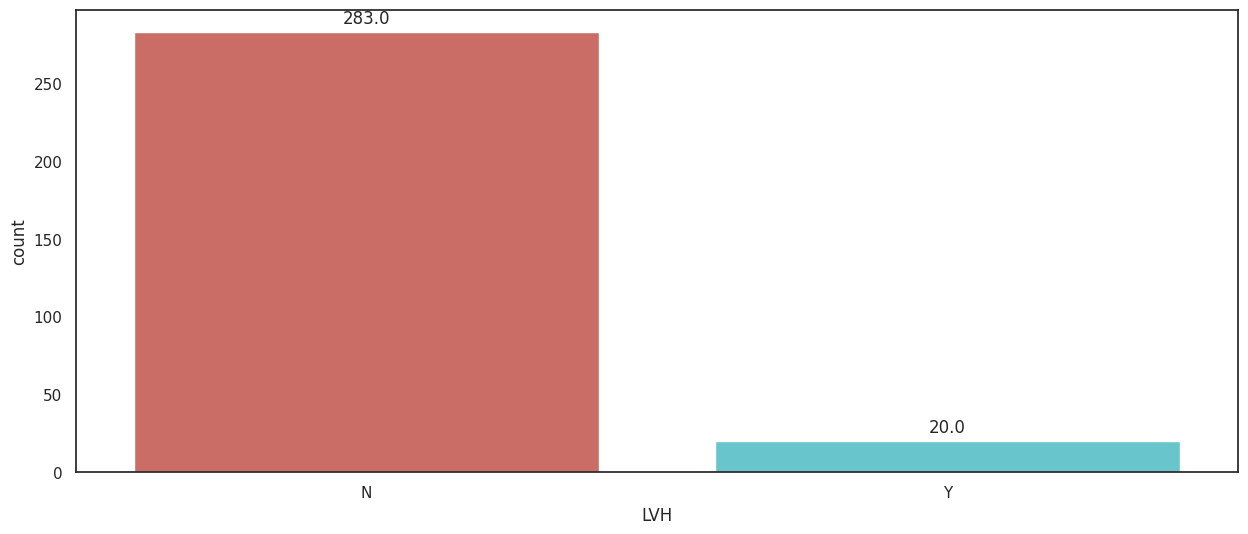

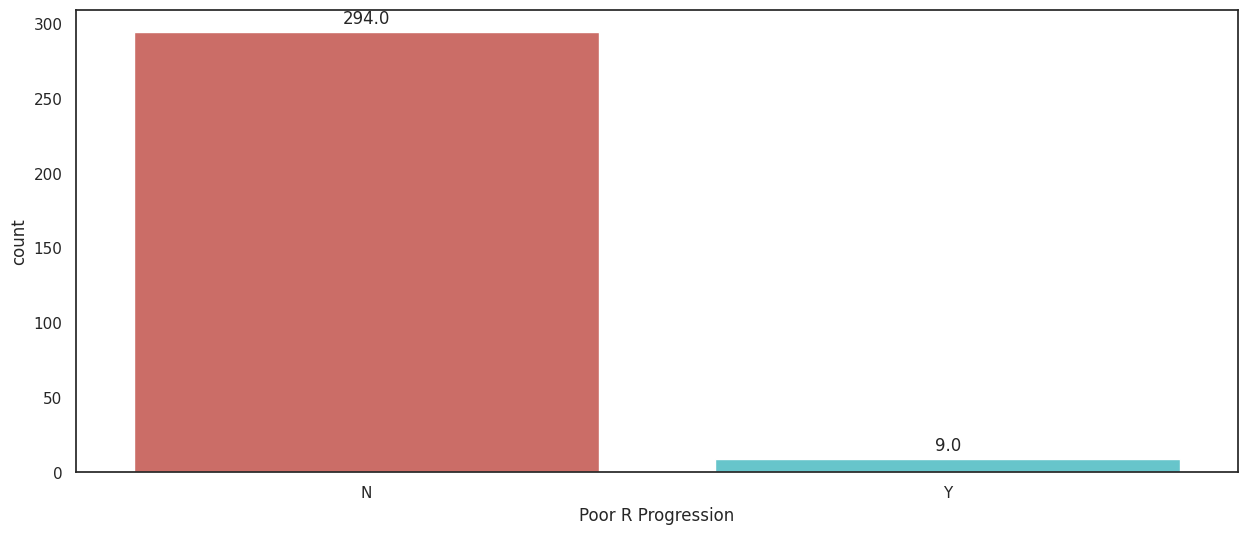

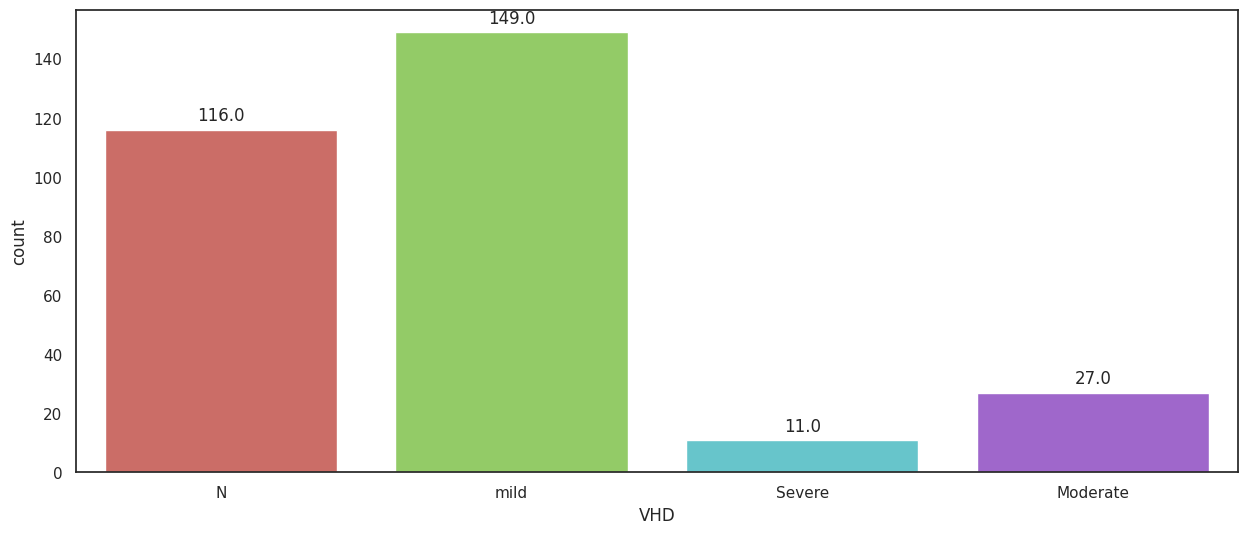

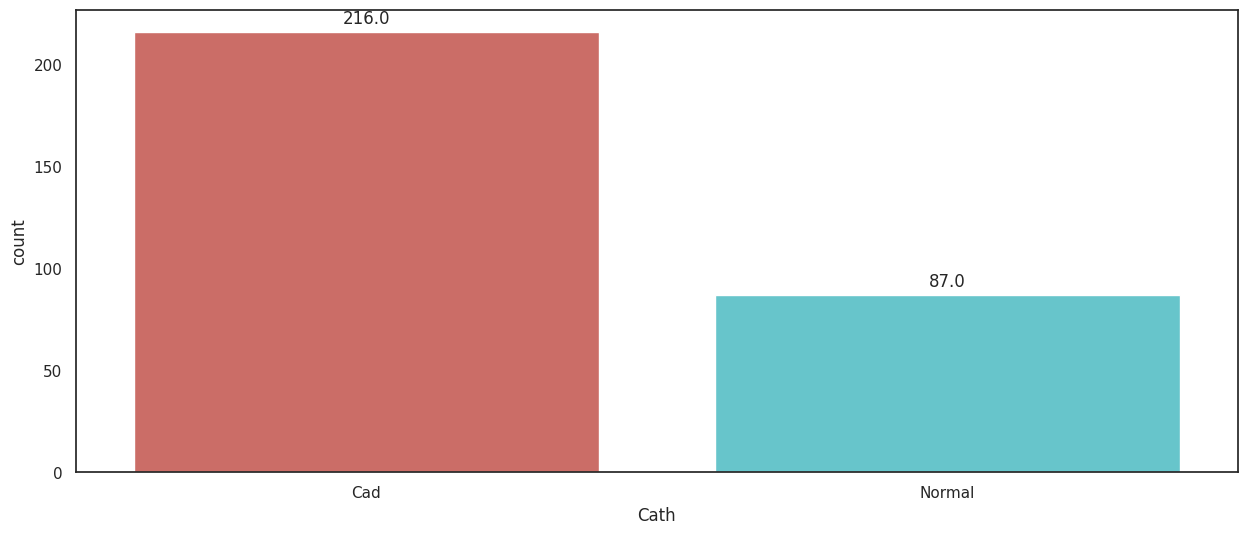

In [61]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [63]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object

encoder = LabelEncoder()

df_encoded = df.copy()

# Iterate over each column in the DataFrame

for col in df_encoded.select_dtypes(include=['object']).columns:
    encoder.fit(df_encoded[col])
    df_encoded[col] = encoder.transform(df_encoded[col])

In [64]:
df_encoded.head()

Age  Weight  Length  Sex        BMI  DM  HTN  Current Smoker  EX-Smoker  \
0   53      90     175    1  29.387755   0    1               1          0   
1   67      70     157    0  28.398718   0    1               0          0   
2   54      54     164    1  20.077335   0    0               1          0   
3   66      67     158    0  26.838648   0    1               0          0   
4   50      87     153    0  37.165193   0    1               0          0   

   FH  ...    K   Na    WBC  Lymph  Neut  PLT  EF-TTE  Region RWMA  VHD  Cath  
0   0  ...  4.7  141   5700     39    52  261      50            0    1     0  
1   0  ...  4.7  156   7700     38    55  165      40            4    1     0  
2   0  ...  4.7  139   7400     38    60  230      40            2    3     0  
3   0  ...  4.4  142  13000     18    72  742      55            0    2     1  
4   0  ...  4.0  140   9200     55    39  274      50            0    2     1  

[5 rows x 55 columns]

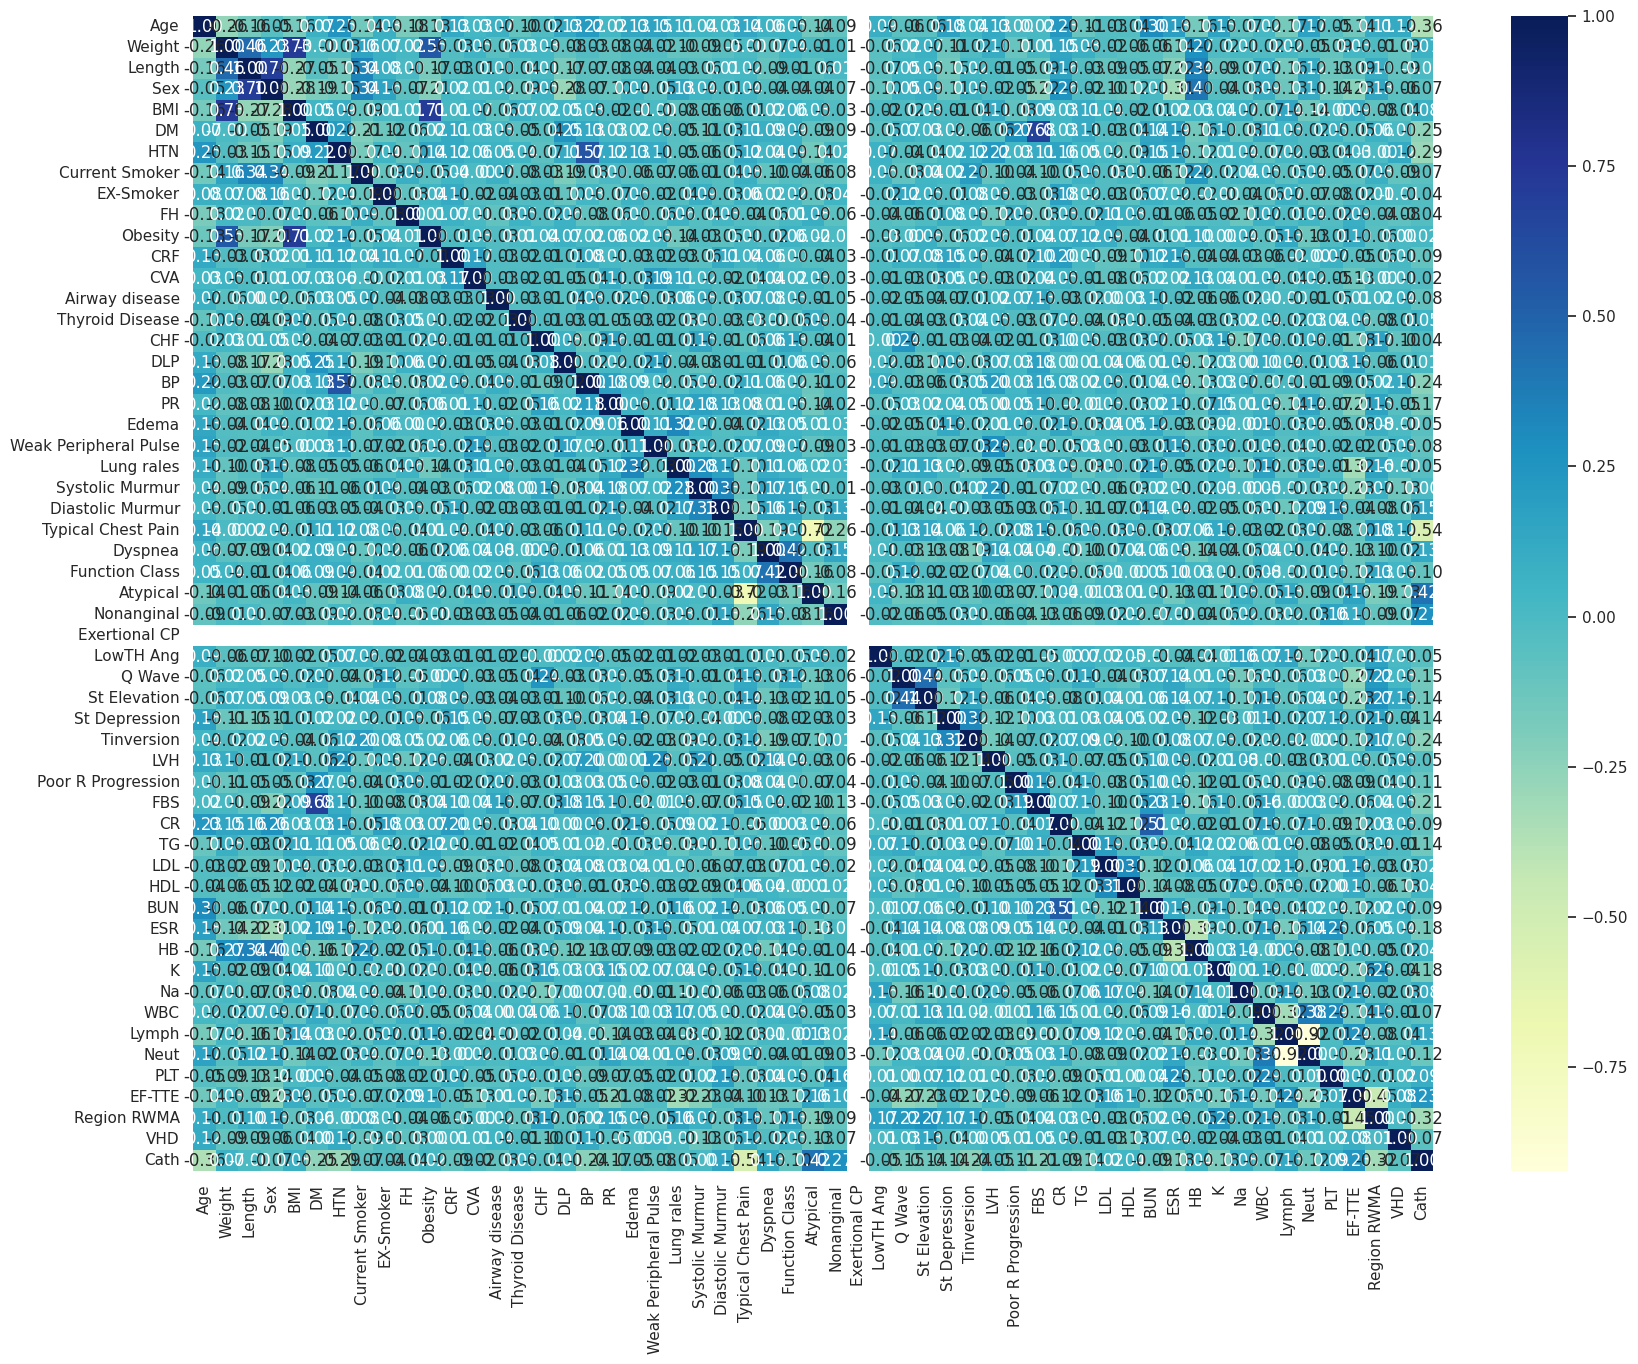

In [65]:
corr = df_encoded.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.show()

In [66]:
correlation = df_encoded.corr()
target_corr = correlation['Cath'].abs().sort_values(ascending=False)

# Select features with correlation above a threshold
selected_features = target_corr[target_corr > 0.3].index.tolist()
print("Selected Features:", selected_features)

Selected Features: ['Cath', 'Typical Chest Pain', 'Atypical', 'Age', 'Region RWMA']


In [91]:
df_new = df_encoded[selected_features]

In [68]:
df_new

Cath  Typical Chest Pain  Atypical  Age  Region RWMA
0       0                   0         0   53            0
1       0                   1         0   67            4
2       0                   1         0   54            2
3       1                   0         0   66            0
4       1                   0         0   50            0
..    ...                 ...       ...  ...          ...
298     0                   1         0   58            0
299     1                   0         1   55            0
300     1                   0         0   48            0
301     1                   0         1   57            0
302     0                   1         0   56            0

[303 rows x 5 columns]

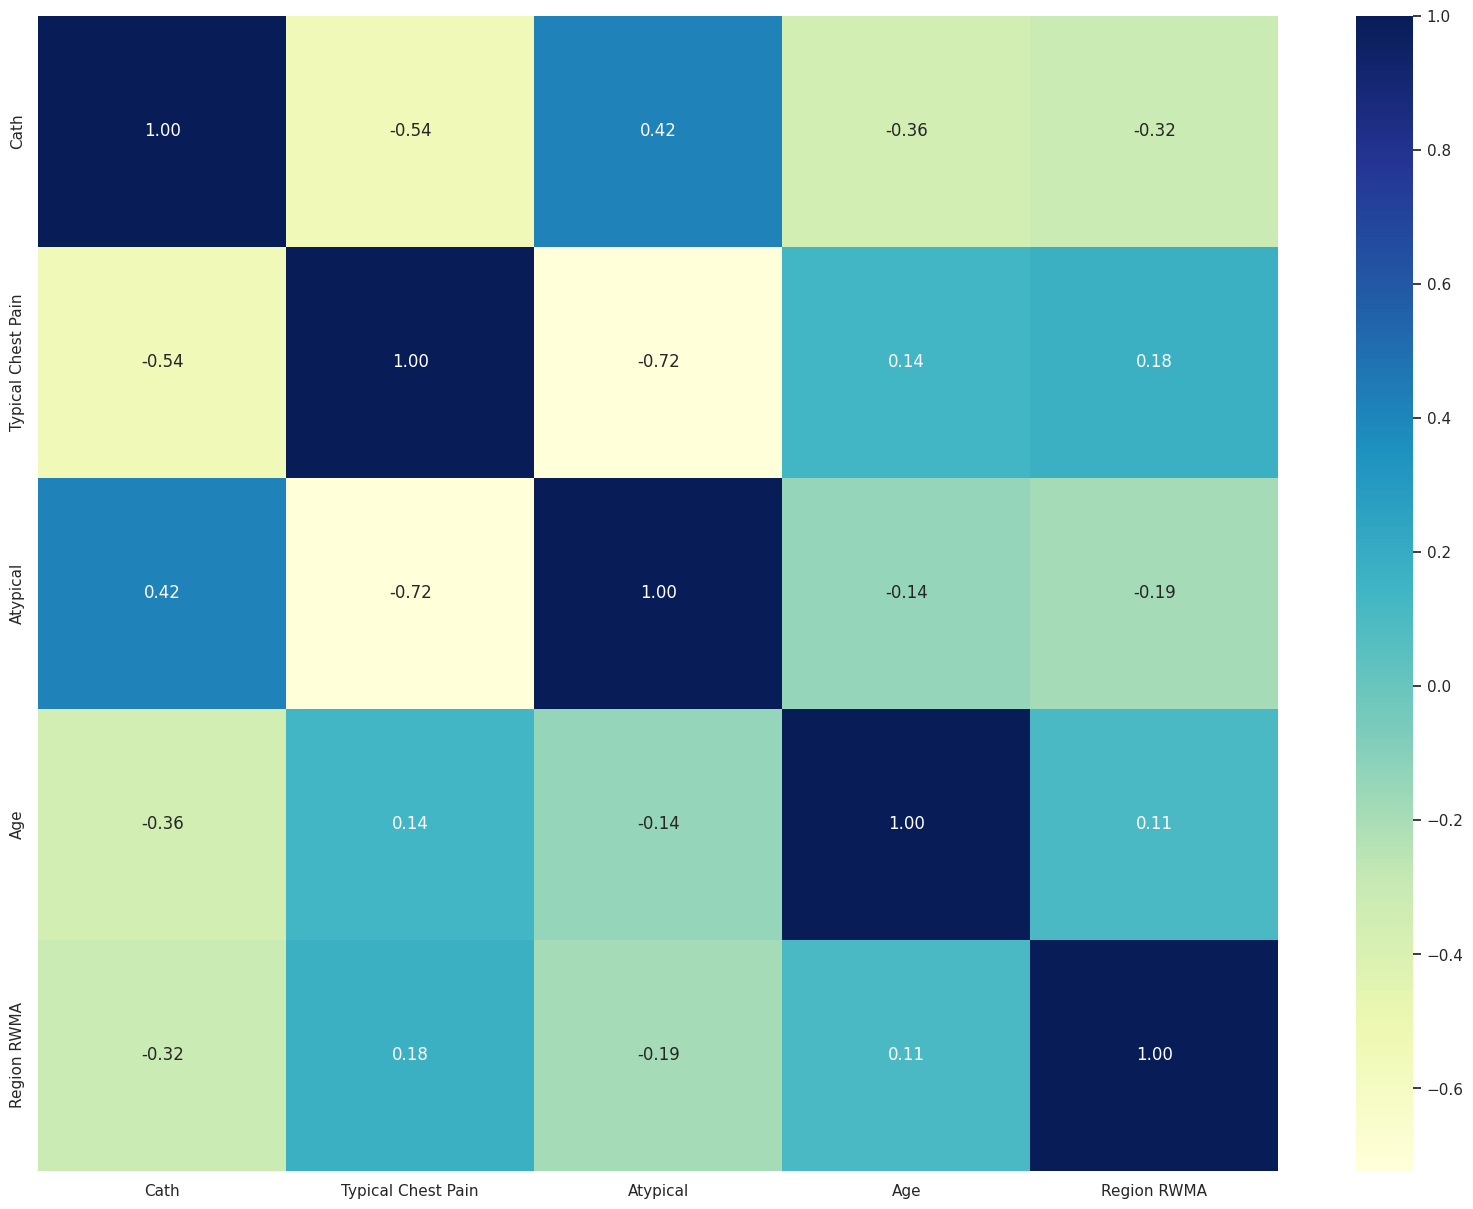

In [69]:
corr = df_new.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.show()

In [114]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(df_new,2,["Typical Chest Pain","Atypical","Age","Region RWMA"])

In [115]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Cath                303 non-null    int64
 1   Typical Chest Pain  303 non-null    int64
 2   Atypical            303 non-null    int64
 3   Age                 303 non-null    int64
 4   Region RWMA         303 non-null    int64
dtypes: int64(5)
memory usage: 12.0 KB


### Modeling

In [70]:
from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [93]:
X = df_new.drop(columns=['Cath'])
y = df_new['Cath']

In [94]:
# Apply PCA to "Age" and "Region RWMA"
columns_to_pca = ["Age", "Region RWMA"]
pca_data = X[columns_to_pca]

In [95]:
# Standardize the PCA columns
scaler = StandardScaler()
pca_scaled = scaler.fit_transform(pca_data)


In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  # Choose 2 components for dimensionality reduction
pca_result = pca.fit_transform(pca_scaled)

In [97]:
# Replace the original columns with PCA components
X = X.drop(columns=columns_to_pca)  # Drop the original columns
pca_df = pd.DataFrame(pca_result, columns=['PCA1_Age_RWMA', 'PCA2_Age_RWMA'], index=X.index)
X = pd.concat([X, pca_df], axis=1)  # Add PCA components

In [98]:
# Standardize the entire dataset (excluding target) after adding PCA columns
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

I compared 10 popular classifiers and evaluate the mean accuracy of each of them by a stratified kfold cross validation procedure.

* SVC
* Decision Tree
* AdaBoost 
* Random Forest
* Extra Trees
* Gradient Boosting
* Multiple layer perceprton (neural network)
* KNN
* Logistic regression
* Linear Discriminant Analysis

In [100]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


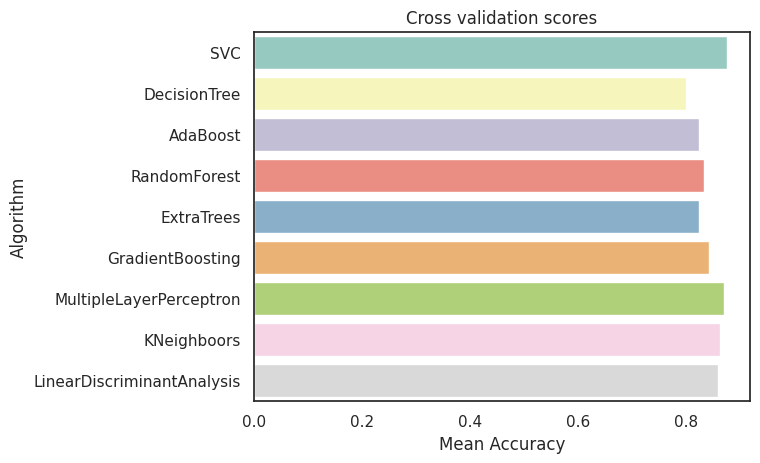

In [101]:
# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
#classifiers.append(LogisticRegression(random_state = random state)
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LinearDiscriminantAnalysis"]})

# Now plotting the barplot with the correct syntax
g = sns.barplot(x="CrossValMeans", y="Algorithm", data=cv_res, palette="Set3", orient="h", ci=None)
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


In [102]:
import warnings
warnings.filterwarnings('ignore')


In [103]:
### META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_


Fitting 10 folds for each of 112 candidates, totalling 1120 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'ba

In [104]:
gsadaDTC.best_score_

0.8175000000000001

In [105]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_


Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.8676666666666668

In [106]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.8596666666666668

In [107]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_


Fitting 10 folds for each of 72 candidates, totalling 720 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
 

0.8591666666666666

In [108]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


0.8880000000000001

### Plotting into Curves

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
 

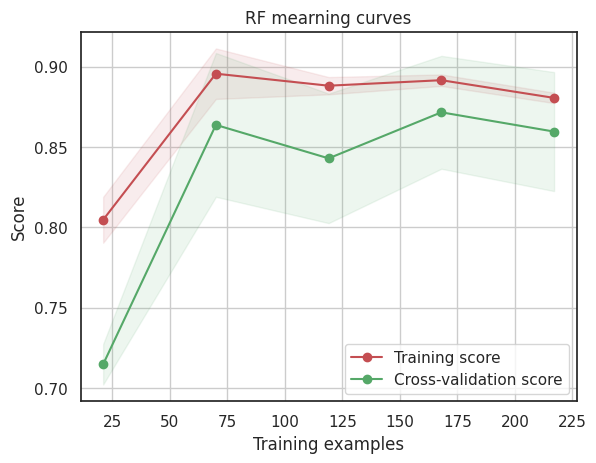

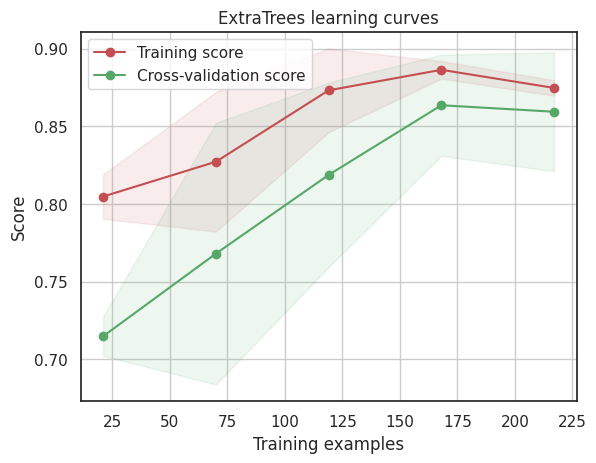

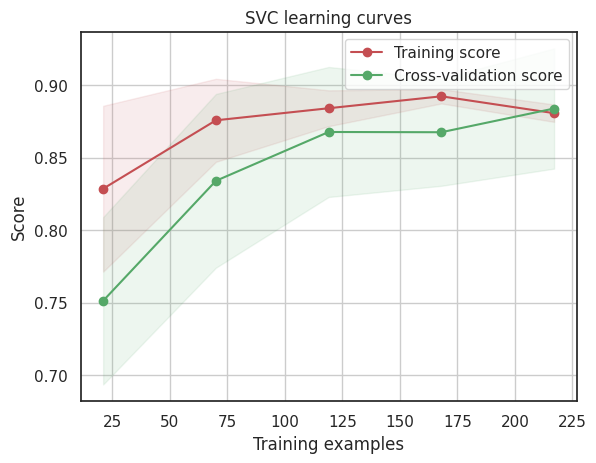

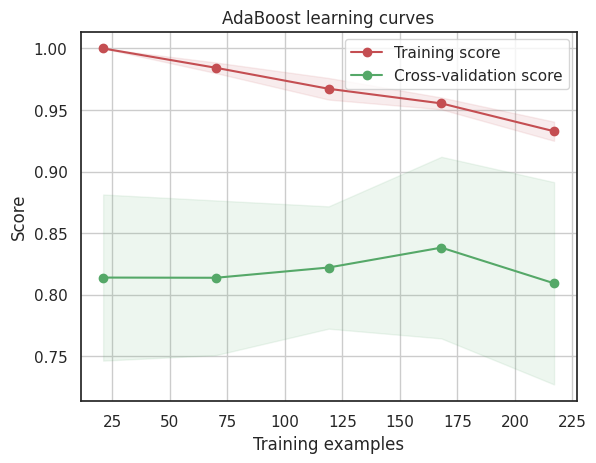

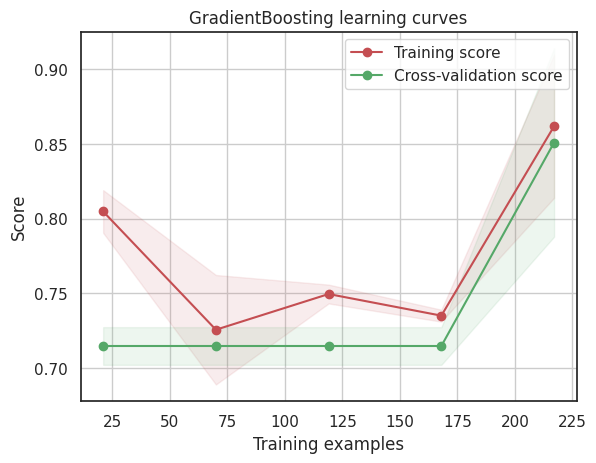

In [109]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,y_train,cv=kfold)



#### Feature importance of tree based classifiers

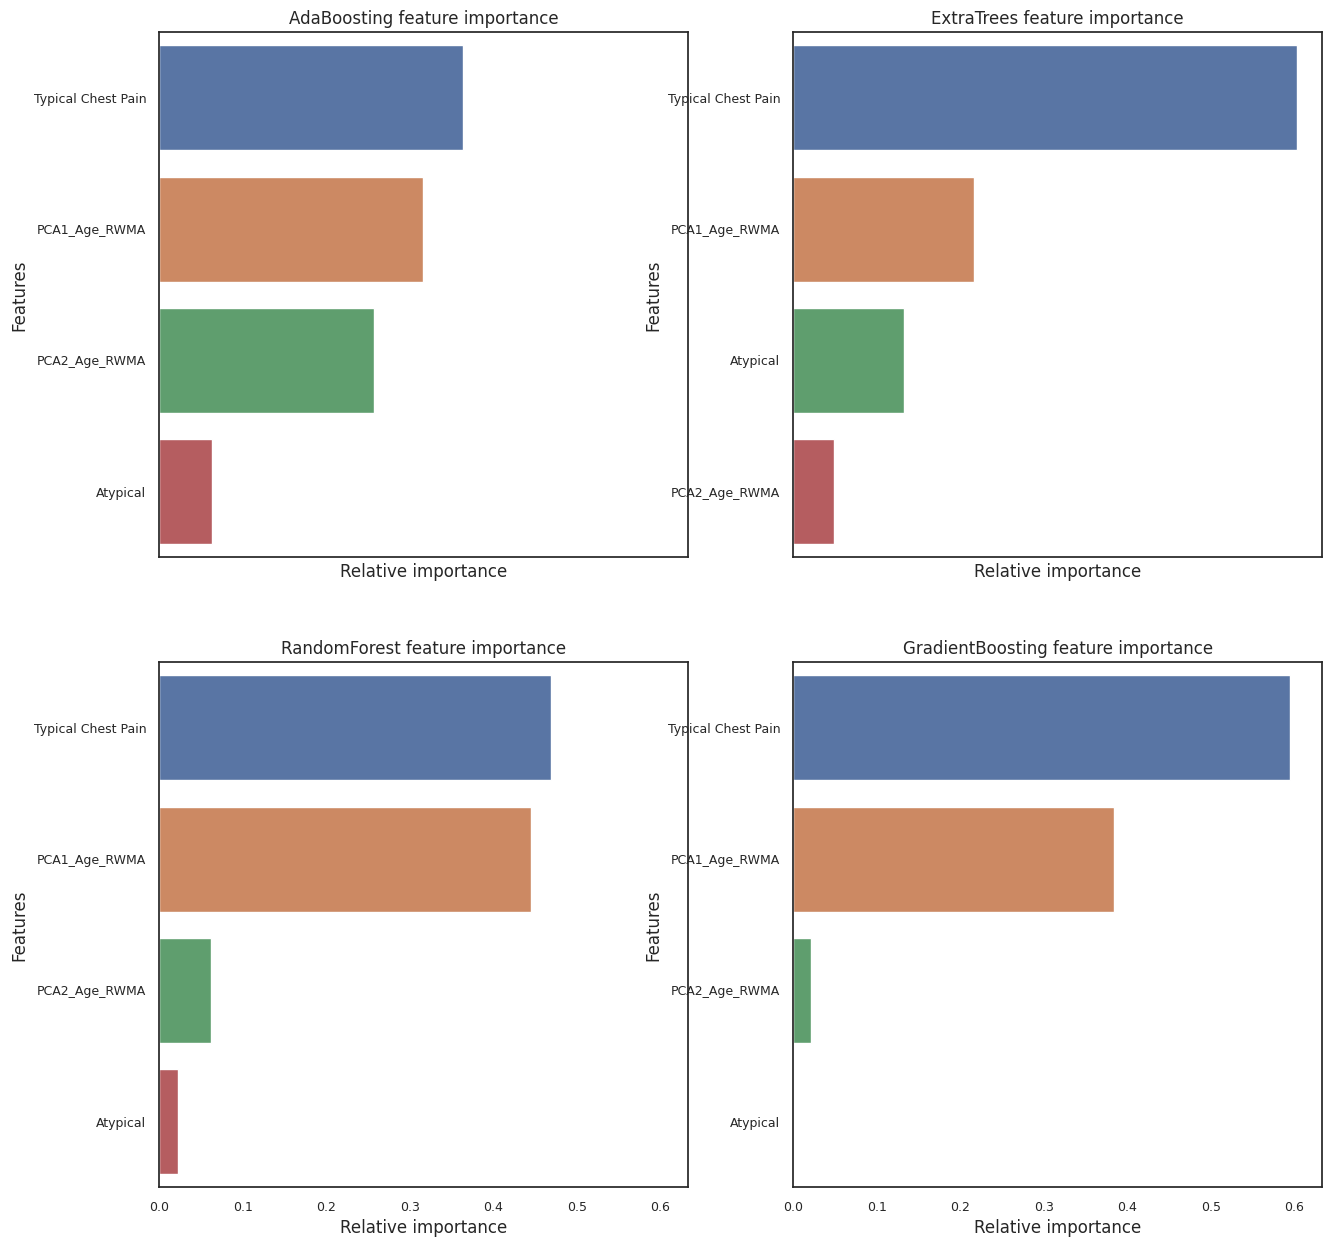

In [110]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

names_classifiers = [("AdaBoosting", ada_best),("ExtraTrees",ExtC_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

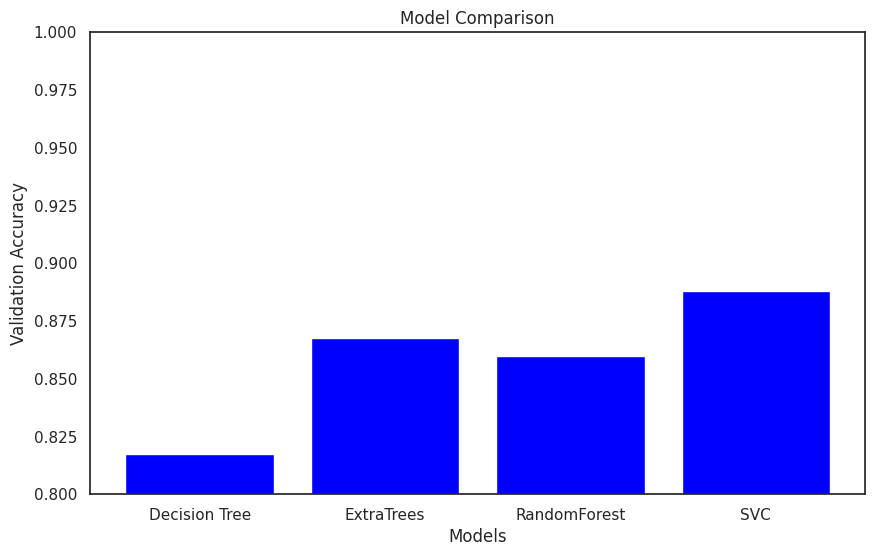

In [111]:
model_names = ['Decision Tree', 'ExtraTrees', 'RandomForest', 'SVC']
model_scores = [gsadaDTC.best_score_,gsExtC.best_score_, gsRFC.best_score_, gsSVMC.best_score_]  # Replace with actual validation scores

plt.figure(figsize=(10, 6))
plt.bar(model_names, model_scores, color='blue')
plt.title('Model Comparison')
plt.ylabel('Validation Accuracy')
plt.xlabel('Models')
plt.ylim(0.8, 1.0)  # Adjust based on actual scores
plt.show()

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multiclass
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50


I0000 00:00:1732285175.016771     303 service.cc:145] XLA service 0x7955a0005de0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732285175.016814     303 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732285175.016817     303 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


1/8 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.3750 - loss: 0.7318

I0000 00:00:1732285178.367055     303 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 488ms/step - accuracy: 0.4923 - loss: 0.6943 - val_accuracy: 0.7869 - val_loss: 0.5723
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7740 - loss: 0.5609 - val_accuracy: 0.7869 - val_loss: 0.4931
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8094 - loss: 0.4824 - val_accuracy: 0.7869 - val_loss: 0.4440
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8901 - loss: 0.4024 - val_accuracy: 0.8033 - val_loss: 0.4181
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8514 - loss: 0.3759 - val_accuracy: 0.8197 - val_loss: 0.4038
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8538 - loss: 0.3707 - val_accuracy: 0.8197 - val_loss: 0.3975
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8781 - loss: 0.3315 - val_accuracy: 0.8197 - val_loss: 0.3962
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8953 - loss: 0.2843 - val_accuracy: 0.8197 - val_loss: 0.3982
Epoch 9/50
8/8 ━━

In [117]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 80.33%


In [119]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
ensemble_model = VotingClassifier(estimators=[
    ('xgb', XGBClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
], voting='soft')
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)


In [121]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Model Accuracy: {accuracy * 100:.2f}%")

Ensemble Model Accuracy: 81.97%
